# 1. Giới thiệu dự án
**Vi-rút Corona** là một họ vi rút có thể gây bệnh, có thể thay đổi từ * cảm lạnh thông thường * và * ho * đến bệnh đôi khi nặng hơn. ** Hội chứng hô hấp Trung Đông (MERS-CoV) ** và ** Hội chứng hô hấp cấp tính nặng (SARS-CoV) ** là những trường hợp nghiêm trọng mà thế giới đã phải đối mặt. <br> ** SARS-CoV-2 (n -coronavirus) ** là loại virus mới thuộc họ coronavirus, được * phát hiện lần đầu tiên * vào năm 2019, chưa được xác định ở người trước đây.

Nó là một loại vi-rút *truyền nhiễm* bắt đầu từ ** Vũ Hán ** vào ** tháng 12 năm 2019 **. Sau đó được tuyên bố là ** Đại dịch ** bởi ** WHO ** do tỷ lệ lây lan cao trên toàn thế giới. Hiện tại (vào ngày 21 tháng 4 năm 2021), điều này dẫn đến tổng số 500.000+ Số ca tử vong trên toàn cầu. <br>

Đại dịch đang lan rộng trên toàn thế giới; nhận thức về sự lây lan này trở nên quan trọng hơn. NoteBook này là một nỗ lực để phân tích dữ liệu tích lũy của các trường hợp đã xác nhận, tử vong và đã được phục hồi theo thời gian.
     <br>
   <font face = "Verdana" size ="1">
    <center><img src='https://www.statnews.com/wp-content/uploads/2020/02/Coronavirus-CDC-645x645.jpg'></center> 
    </font>
 <center><font face = "Verdana" size ="4"> Mạnh mẽ lên, thế giới! Hãy an toàn và khỏe mạnh. </font><center>

<br>

# Mục lục
* [2. Tải xuống và cài đặt Prerequisite](#2.-Downloading-and-Installing-Prerequisite)
    
* [3. Tải xuống Tập dữ liệu và tìm hiểu dữ liệu](#3.-Downloading-the-Dataset)

* [4. Phân tích toàn cầu](#4.-Global-Analysis)

    * [Bài toán 1](#Problem-1)
    * [Bài toán 2](#Problem-2)
    * [Bài toán 3](#Problem-3)
    * [Bài toán 4](#Problem-4)
    * [Bài toán 5](#Problem-5)
    * [Bài toán 6](#Problem-6)
    * [Bài toán 7](#Problem-7)

* [5. Phân tích theo lục địa](#5.-Continent-Analysis)
    * [Bài toán 8](#Problem-8)
    * [Bài toán 9](#Problem-9)
    * [Bài toán 10](#Problem-10)
    * [Bài toán 11](#Problem-11)
    * [Bài toán 12](#Problem-12)
    * [Bài toán 13](#Problem-13)

* [6. Phân tích theo quốc gia](#5.-Country-Analysis)
    * [Bài toán 14](#Problem-14)
    * [Bài toán 15](#Problem-15)
    * [Bài toán 16](#Problem-16)
    * [Bài toán 17](#Problem-17)
    
* [7. Phân tích nâng cao](#7.-Advanced-Analysis)
    * [Bài toán 18](#Problem-18)
    * [Bài toán 19](#Problem-19)
    * [Bài toán 20](#Problem-20)
    * [Bài toán 21](#Problem-21)
    * [Bài toán 22](#Problem-22)

# 2. Tải xuống và Cài đặt Prerequisite
**pycountry_convert**: Sử dụng dữ liệu quốc gia lấy từ wikipedia, gói này cung cấp các chức năng chuyển đổi giữa tên quốc gia ISO, mã quốc gia và tên lục địa.

**folium, seaborn, plotly**: Một số gói trực quan hóa trong Python.

Bỏ ghi chú và cài đặt một số gói nếu bạn chưa cài đặt chúng. Nếu không, hãy tiếp tục.

In [1]:

!pip install pycountry_convert 
!pip install folium
!pip install seaborn
!pip install plotly
!pip install geopandas


In [1]:
#Importing the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker 
import pycountry_convert as pc
import folium
from pycountry_convert import country_mappings as cm
from datetime import datetime, timedelta,date
from scipy.interpolate import make_interp_spline, BSpline
import plotly.express as px
import plotly.graph_objs as go
import json
import plotly.offline as py
import seaborn as sns
import plotly.express as px
import csv
import requests
plt.style.use('fivethirtyeight')

# 3. Tải xuống tập dữ liệu và tìm hiểu dữ liệu
Sau khi tải xuống tập dữ liệu, hãy trả lời các câu hỏi sau:
- Xác định ngày đầu tiên bộ dữ liệu bắt đầu lưu trữ số ca Covid của 3 bộ dữ liệu.
- Xác định ngày cuối cùng dữ liệu được cập nhật số ca Covid của 3 bộ dữ liệu.
- Xác định có bao nhiêu quốc gia trong dữ liệu này.
- Tính tổng số ngày có trong 3 bộ dữ liệu
Quan sát xem có quốc gia nào bị trùng lặp trong 3 bộ dữ liệu hay không.
- Xác định những quốc gia có trong 3 bộ dữ liệu được lưu trữ số ca Covid theo toàn quốc chứ không theo từng thành phố.
- Xác định những quốc gia có trong 3 bộ dữ liệu được lưu trữ số ca Covid theo từng thành phố.
- Xác định quốc gia và ngày mà có số ca Covid nhiều nhất.
- Xác định quốc gia có tổng số người mất do Covid là nhiều nhất.
- Tính tổng số ca Covid, số ca tử vong, cố ca hồi phục và số ca còn Covid ở thời điểm hiện tại của Việt Nam.

Tập dữ liệu này được cập nhật hàng ngày bởi Johns Hopkins CSSE.

In [2]:
# Global Data
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [3]:
confirmed_df = confirmed_df.loc[:,:"8/4/21"]
deaths_df = deaths_df.loc[:,:"8/4/21"]
recoveries_df = recoveries_df.loc[:,:"8/4/21"]

Đồng nhất dữ liệu của cột Province/State và cột Country/Region ở cả 3 dataframe confirmed_df, deaths_df và recoveries_df

In [4]:
Country_State_df=pd.merge(pd.merge(confirmed_df,deaths_df, on=['Province/State','Country/Region'] ), recoveries_df, on=['Province/State','Country/Region'])
Country_State_df=Country_State_df[['Province/State','Country/Region']]

confirmed_df=pd.merge(Country_State_df,confirmed_df, on=['Province/State','Country/Region'] )
deaths_df=pd.merge(Country_State_df,deaths_df, on=['Province/State','Country/Region'] )
recoveries_df=pd.merge(Country_State_df,recoveries_df, on=['Province/State','Country/Region'] )

In [5]:
#Xác định ngày đầu tiên bộ dữ liệu bắt đầu lưu trữ số ca Covid của 3 bộ dữ liệu.
first_day_confirmed=confirmed_df.columns.to_list()[4]
first_day_deaths=deaths_df.columns.to_list()[4]
first_day_recoveries=recoveries_df.columns.to_list()[4]

print('The first day of data confirmed:', first_day_confirmed)
print('The first day of data deaths:', first_day_deaths)
print('The first day of data recoveries:', first_day_recoveries)

The first day of data confirmed: 1/22/20
The first day of data deaths: 1/22/20
The first day of data recoveries: 1/22/20


In [6]:
#Xác định ngày cuối cùng dữ liệu được cập nhật số ca Covid của 3 bộ dữ liệu.
last_day_confirmed=confirmed_df.columns.to_list()[-1]
last_day_deaths=deaths_df.columns.to_list()[-1]
last_day_recoveries=recoveries_df.columns.to_list()[-1]

print('The last day of data confirmed:', last_day_confirmed)
print('The last day of data deaths:', last_day_deaths)
print('The last day of data recoveries:', last_day_recoveries)

The last day of data confirmed: 8/4/21
The last day of data deaths: 8/4/21
The last day of data recoveries: 8/4/21


In [7]:
#Xác định có bao nhiêu quốc gia trong dữ liệu này.
qt_countrys_confirmed=confirmed_df.nunique().loc['Country/Region']
qt_countrys_deaths=deaths_df.nunique().loc['Country/Region']
qt_countrys_recoveries=recoveries_df.nunique().loc['Country/Region']

print('Quantity countrys of data confirmed:', qt_countrys_confirmed)
print('Quantity countrys of data deaths:', qt_countrys_deaths)
print('Quantity countrys of data recoveries:', qt_countrys_recoveries)

Quantity countrys of data confirmed: 200
Quantity countrys of data deaths: 200
Quantity countrys of data recoveries: 200


In [8]:
#Tính tổng số ngày có trong 3 bộ dữ liệu
qt_days_confirmed=(pd.to_datetime(last_day_confirmed)-pd.to_datetime(first_day_confirmed)).days
qt_days_deaths=(pd.to_datetime(last_day_deaths)-pd.to_datetime(first_day_deaths)).days
qt_days_recoveries=(pd.to_datetime(last_day_confirmed)-pd.to_datetime(first_day_recoveries)).days

print('Quantity days of data confirmed:', qt_days_confirmed)
print('Quantity days of data deaths:', qt_days_deaths)
print('Quantity days of data recoveries:', qt_days_recoveries)
#Quan sát xem có quốc gia nào bị trùng lặp trong 3 bộ dữ liệu hay không.

Quantity days of data confirmed: 560
Quantity days of data deaths: 560
Quantity days of data recoveries: 560


In [9]:
#Xác định những quốc gia có trong 3 bộ dữ liệu được lưu trữ số ca Covid theo toàn quốc chứ không theo từng thành phố.
al_country_confirmed=confirmed_df[confirmed_df['Province/State'].isnull()]['Country/Region']
al_country_deaths=deaths_df[deaths_df['Province/State'].isnull()]['Country/Region']
al_country_recoveries=recoveries_df[recoveries_df['Province/State'].isnull()]['Country/Region']

print('Country of data confirmed:', list(al_country_confirmed))
print('Country of data deaths:', list(al_country_deaths))
print('Country of data recoveries:', list(al_country_recoveries))

Country of data confirmed: ['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Central African Republic', 'Chad', 'Chile', 'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary', 'Iceland', 'India',

In [10]:
#Xác định những quốc gia có trong 3 bộ dữ liệu được lưu trữ số ca Covid theo từng thành phố.

al_state_confirmed=confirmed_df[confirmed_df['Province/State'].notnull()]['Country/Region']
al_state_deaths=deaths_df[deaths_df['Province/State'].notnull()]['Country/Region']
al_state_recoveries=recoveries_df[recoveries_df['Province/State'].notnull()]['Country/Region']

print('Country of data confirmed:', list(al_state_confirmed.unique()))
print('Country of data deaths:', list(al_state_deaths.unique()))
print('Country of data recoveries:', list(al_state_recoveries.unique()))

Country of data confirmed: ['Australia', 'China', 'Denmark', 'France', 'Netherlands', 'New Zealand', 'United Kingdom']
Country of data deaths: ['Australia', 'China', 'Denmark', 'France', 'Netherlands', 'New Zealand', 'United Kingdom']
Country of data recoveries: ['Australia', 'China', 'Denmark', 'France', 'Netherlands', 'New Zealand', 'United Kingdom']


In [11]:
#Xác định quốc gia và ngày mà có số ca Covid nhiều nhất.

max_confirmed=confirmed_df.groupby('Country/Region').sum()
max_confirmed=confirmed_df[confirmed_df==confirmed_df.max(axis=0,numeric_only=True).max()]
max_only_confirmed=max_confirmed.dropna(how='all',axis=1).dropna(how='all',axis=0)
day_max_confirmed=max_only_confirmed.columns.to_list()
country_max_confirmed=confirmed_df['Country/Region'].loc[max_only_confirmed.index.to_list()].to_list()
print('Contry max confirmed',country_max_confirmed)
print('Day max confirmed', day_max_confirmed)

max_deaths=deaths_df.groupby('Country/Region').sum()
max_deaths=deaths_df[deaths_df==deaths_df.max(axis=0,numeric_only=True).max()]
max_only_deaths=max_deaths.dropna(how='all',axis=1).dropna(how='all',axis=0)
day_max_deaths=max_only_deaths.columns.to_list()
country_max_deaths=deaths_df['Country/Region'].loc[max_only_deaths.index.to_list()].to_list()
print('Contry max deaths',country_max_deaths)
print('Day max deaths', day_max_deaths)

max_recoveries=recoveries_df.groupby('Country/Region').sum()
max_recoveries=recoveries_df[recoveries_df==recoveries_df.max(axis=0,numeric_only=True).max()]
max_only_recoveries=max_recoveries.dropna(how='all',axis=1).dropna(how='all',axis=0)
day_max_recoveries=max_only_recoveries.columns.to_list()
country_max_recoveries=recoveries_df['Country/Region'].loc[max_only_recoveries.index.to_list()].to_list()
print('Contry max confirmed',country_max_recoveries)
print('Day max confirmed', day_max_recoveries)

Contry max confirmed ['US']
Day max confirmed ['8/4/21']
Contry max deaths ['US']
Day max deaths ['8/4/21']
Contry max confirmed ['India']
Day max confirmed ['8/4/21']


In [12]:
#Tính tổng số ca Covid, số ca tử vong, cố ca hồi phục và số ca còn Covid ở thời điểm hiện tại của Việt Nam.
vietnam_confirmed=confirmed_df[confirmed_df['Country/Region']=='Vietnam'].index
total_vietnam_confirmed=confirmed_df.iloc[vietnam_confirmed,-1]
print('Tong so ca covid tai Viet Nam:',total_vietnam_confirmed.values)

vietnam_deaths=deaths_df[deaths_df['Country/Region']=='Vietnam'].index
total_vietnam_deaths=deaths_df.iloc[vietnam_deaths,-1]
print('Tong so ca covid tu vong tai Viet Nam:',total_vietnam_deaths.values)

vietnam_recoveries=recoveries_df[recoveries_df['Country/Region']=='Vietnam'].index
total_vietnam_recoveries=recoveries_df.iloc[vietnam_recoveries,-1]
print('Tong so ca covid hoi phuc tai Viet Nam:',total_vietnam_recoveries.values)

print('Tong so ca covid dang dieu tri tai Viet Nam:',total_vietnam_confirmed.values-total_vietnam_deaths.values-total_vietnam_recoveries.values)


Tong so ca covid tai Viet Nam: [181756]
Tong so ca covid tu vong tai Viet Nam: [2327]
Tong so ca covid hoi phuc tai Viet Nam: [54332]
Tong so ca covid dang dieu tri tai Viet Nam: [125097]


## Hãy xem dữ liệu tổng quan:

In [13]:
confirmed_df.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  7/26/21  7/27/21  7/28/21  \
0        0        0        0        0  ...   144285   145008   145552   
1        0        0        0        0  ...   132891   132922   132952   
2        0        0        0        0  ...   163660   165204   167131   
3        0        0        0        0  ...    14577    14586    14586   
4        0        0        0        0  ...    41879    42110    42288   

   7/29/21  7/30/21  7/31/21  8/1/21  8/2/21  8/3/21  8/4/21  
0   145996   146523   147154  147501  147985  148572  148933  
1   132999   133036   133081  133121  133146  133211  133310  
2   168668   170189   171392  172564  173922  175229  176724  
3    14655    14678    14678   14678   14747   14766   14797  
4    42486    42646    42777   42815   42970   43070   43158  

[5 rows x 565 columns]

In [14]:
deaths_df.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  7/26/21  7/27/21  7/28/21  \
0        0        0        0        0  ...     6477     6515     6577   
1        0        0        0        0  ...     2456     2456     2457   
2        0        0        0        0  ...     4087     4112     4161   
3        0        0        0        0  ...      127      127      127   
4        0        0        0        0  ...      991      994     1000   

   7/29/21  7/30/21  7/31/21  8/1/21  8/2/21  8/3/21  8/4/21  
0     6615     6677     6708    6737    6774    6804    6836  
1     2457     2457     2457    2457    2457    2457    2457  
2     4189     4219     4254    4291    4329    4370    4404  
3      127      128      128     128     128     128     128  
4     1003     1008     1011    1016    1018    1022    1026  

[5 rows x 565 columns]

In [15]:
recoveries_df.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  7/26/21  7/27/21  7/28/21  \
0        0        0        0        0  ...    82586    82586    82586   
1        0        0        0        0  ...   130152   130166   130174   
2        0        0        0        0  ...   111322   112050   112900   
3        0        0        0        0  ...    14077    14113    14113   
4        0        0        0        0  ...    35686    35742    35964   

   7/29/21  7/30/21  7/31/21  8/1/21  8/2/21  8/3/21  8/4/21  
0    82586    82586    82586   82586   82586   82586   82586  
1   130187   130205   130222  130243  130256  130291  130314  
2   113707   114531   115276  116009  116770  117557  118409  
3    14180    14210    14210   14210   14296   14348   14380  
4    36025    36708    37255   37397   38360   39389   39582  

[5 rows x 565 columns]

#  4. Phân tích Toàn cầu

## Bài toán 1

    Tính tổng số trường hợp mắc, tổng số người chết, tổng số người phục hồi và tổng số đang điều trị theo thời gian (theo ngày).

In [16]:
cols = confirmed_df.keys()
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]
dates = confirmed.keys()

total_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = [] 
adjusted_dates = list(np.array([i for i in range(len(dates))]).reshape(-1, 1)[:, 0])

#Nhập mã lập trình của bạn tại đây:

total_cases = confirmed.sum().astype(int)
total_deaths = deaths.sum().astype(int)
total_recovered = recoveries.sum().astype(int)
total_active = total_cases-total_deaths-total_recovered

In [17]:
#  The number of total cases, total deaths, total recovered, and total active until now.
print("Total confirmed cases: ", total_cases[-1])
print("Total death cases: ", total_deaths[-1])
print("Total recoveries cases: ", total_recovered[-1])
print("Total active cases: ", total_active[-1])

Total confirmed cases:  199319782
Total death cases:  4256397
Total recoveries cases:  129493090
Total active cases:  65570295


## Bài toán 2

    Trực quan hóa số lượng và log(10) tổng số trường hợp, tổng số người chết, tổng số người phục hồi và tổng số đang điều trị theo thời gian (đơn vị ngày) trong 2 biểu đồ (một cho số lượng và một cho log(10)) sử dụng biểu đồ đường.

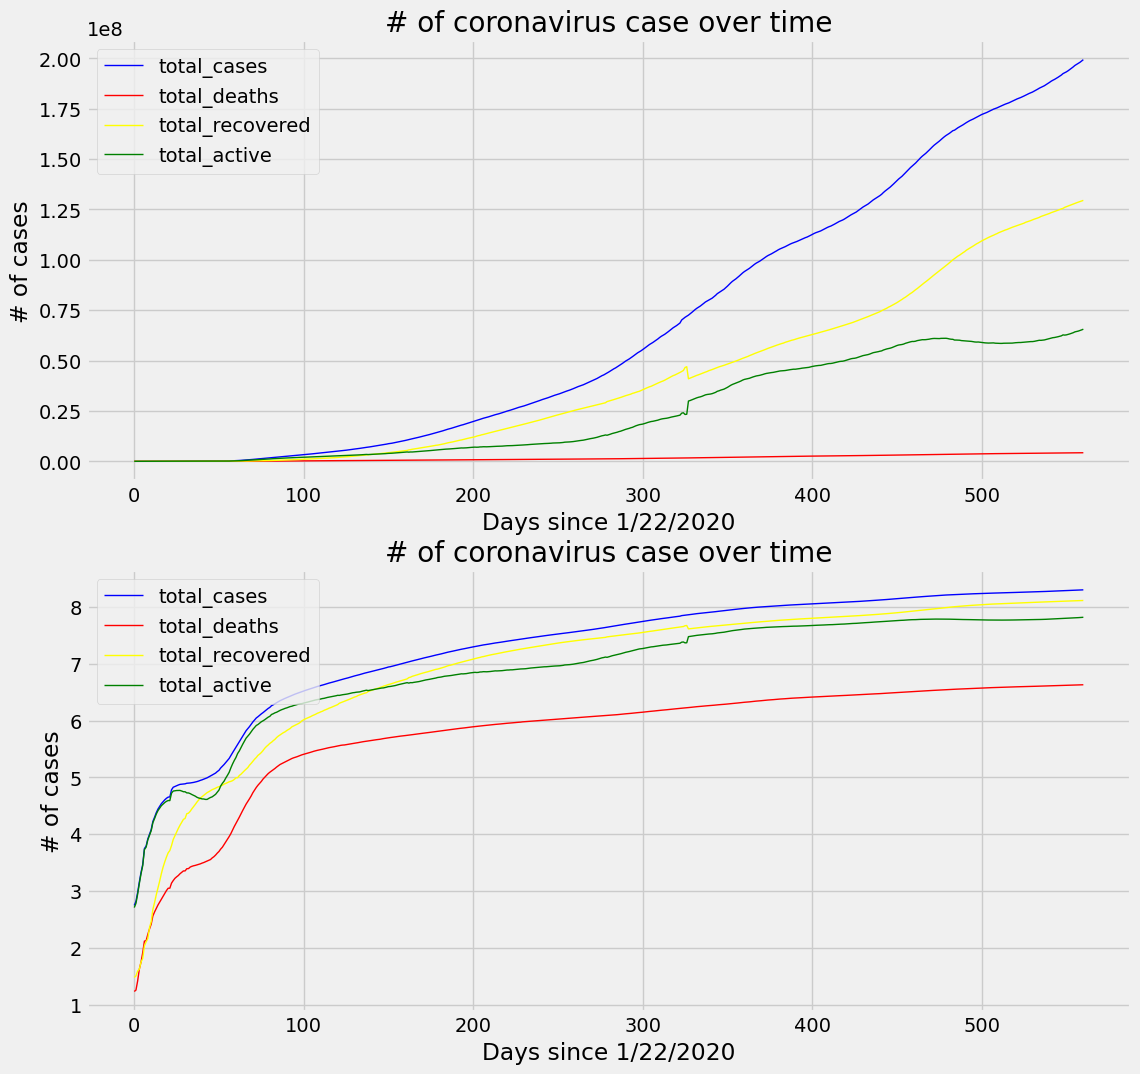

In [18]:
#Nhập mã lập trình của bạn tại đây:
fig, (ax0, ax1) = plt.subplots(2, 1,figsize=[12, 12])

ax0.plot(total_cases.to_list(), color='blue', label='total_cases', linewidth=1)
ax0.plot(total_deaths.to_list(), color='red', label='total_deaths', linewidth=1)
ax0.plot(total_recovered.to_list(), color='yellow', label='total_recovered', linewidth=1)
ax0.plot(total_active.to_list(), color='green', label='total_active', linewidth=1)

ax0.set(xlabel='Days since 1/22/2020',
       ylabel='# of cases',
       title='# of coronavirus case over time')
ax0.legend(loc='upper left')


ax1.plot(np.log10(total_cases.to_list()), color='blue', label='total_cases', linewidth=1)
ax1.plot(np.log10(total_deaths.to_list()), color='red', label='total_deaths', linewidth=1)
ax1.plot(np.log10(total_recovered.to_list()), color='yellow', label='total_recovered', linewidth=1)
ax1.plot(np.log10(total_active.to_list()), color='green', label='total_active', linewidth=1)

ax1.set(xlabel='Days since 1/22/2020',
       ylabel='# of cases',
       title='# of coronavirus case over time')
ax1.legend(loc='upper left')

## Bài toán 3
    Trực quan hóa tổng số ca bệnh, tổng số người chết, tổng số người phục hồi và tổng số đang điều trị theo thời gian (đơn vị ngày) trong 4 biểu đồ được phân tách bằng cách sử dụng biểu đồ đường.

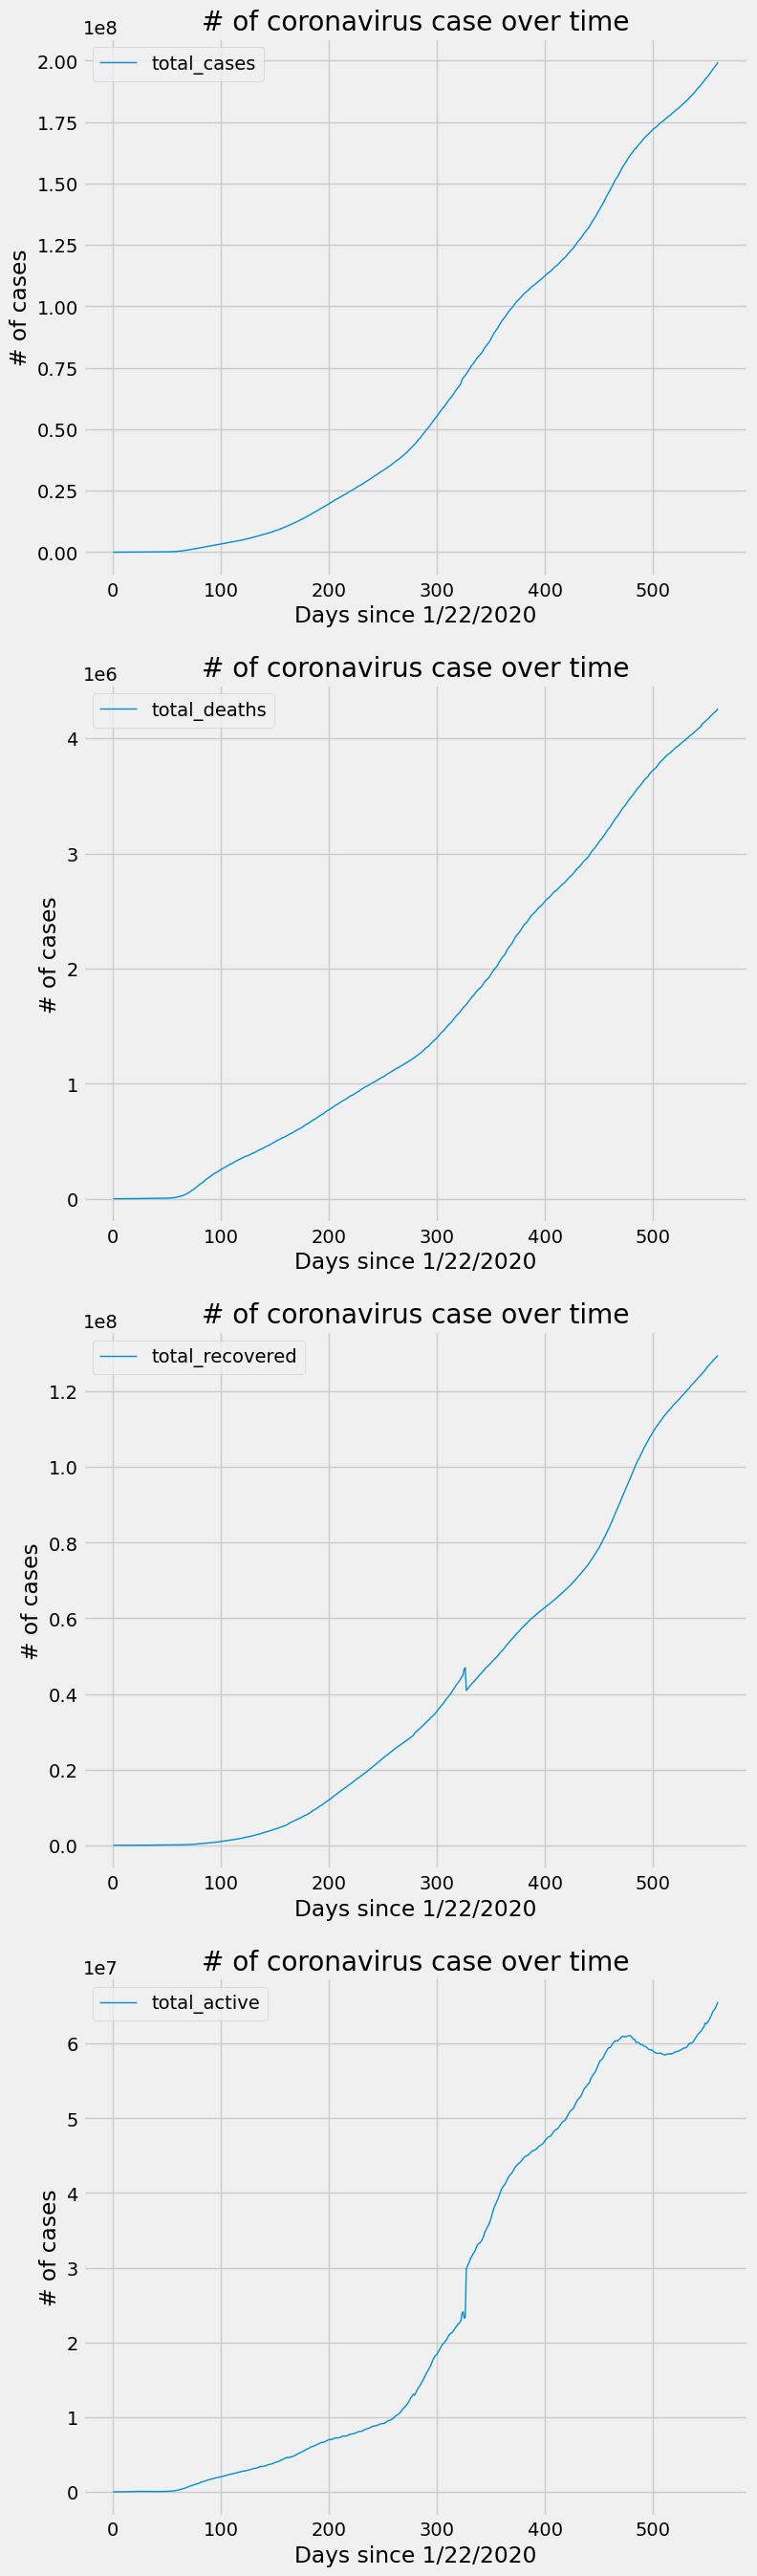

In [19]:
#Nhập mã lập trình của bạn tại đây:
fig, (ax0, ax1, ax2, ax3) = plt.subplots(4, 1,figsize=[8, 8*4])

ax0.plot(total_cases.to_list(), label='total_cases', linewidth=1)
ax0.set(xlabel='Days since 1/22/2020',
       ylabel='# of cases',
       title='# of coronavirus case over time')
ax0.legend(loc='upper left')

ax1.plot(total_deaths.to_list(), label='total_deaths', linewidth=1)
ax1.set(xlabel='Days since 1/22/2020',
       ylabel='# of cases',
       title='# of coronavirus case over time')
ax1.legend(loc='upper left')

ax2.plot(total_recovered.to_list(), label='total_recovered', linewidth=1)
ax2.set(xlabel='Days since 1/22/2020',
       ylabel='# of cases',
       title='# of coronavirus case over time')
ax2.legend(loc='upper left')

ax3.plot(total_active.to_list(), label='total_active', linewidth=1)
ax3.set(xlabel='Days since 1/22/2020',
       ylabel='# of cases',
       title='# of coronavirus case over time')
ax3.legend(loc='upper left')

## Bài toán 4
    Tính toán số lượng gia tăng hàng ngày trong tổng số trường hợp, tổng số người chết, tổng số người hồi phục và tổng số đang điều trị theo thời gian (đơn vị ngày).

In [20]:
#Nhập mã lập trình của bạn tại đây:
total_cases_increases = pd.Series(total_cases).diff().fillna(0).astype(int)
total_deaths_increases= pd.Series(total_deaths).diff().fillna(0).astype(int)
total_recovered_increases = pd.Series(total_recovered).diff().fillna(0).astype(int)
total_active_increases = pd.Series(total_active).diff().fillna(0).astype(int)

## Bài toán 5
    Trực quan hóa số lượng gia tăng hàng ngày về tổng số trường hợp, tổng số người chết, tổng số người phục hồi và tổng số đang điều trị theo thời gian (đơn vị ngày) trong 4 biểu đồ riêng biệt bằng cách sử dụng biểu đồ cột.

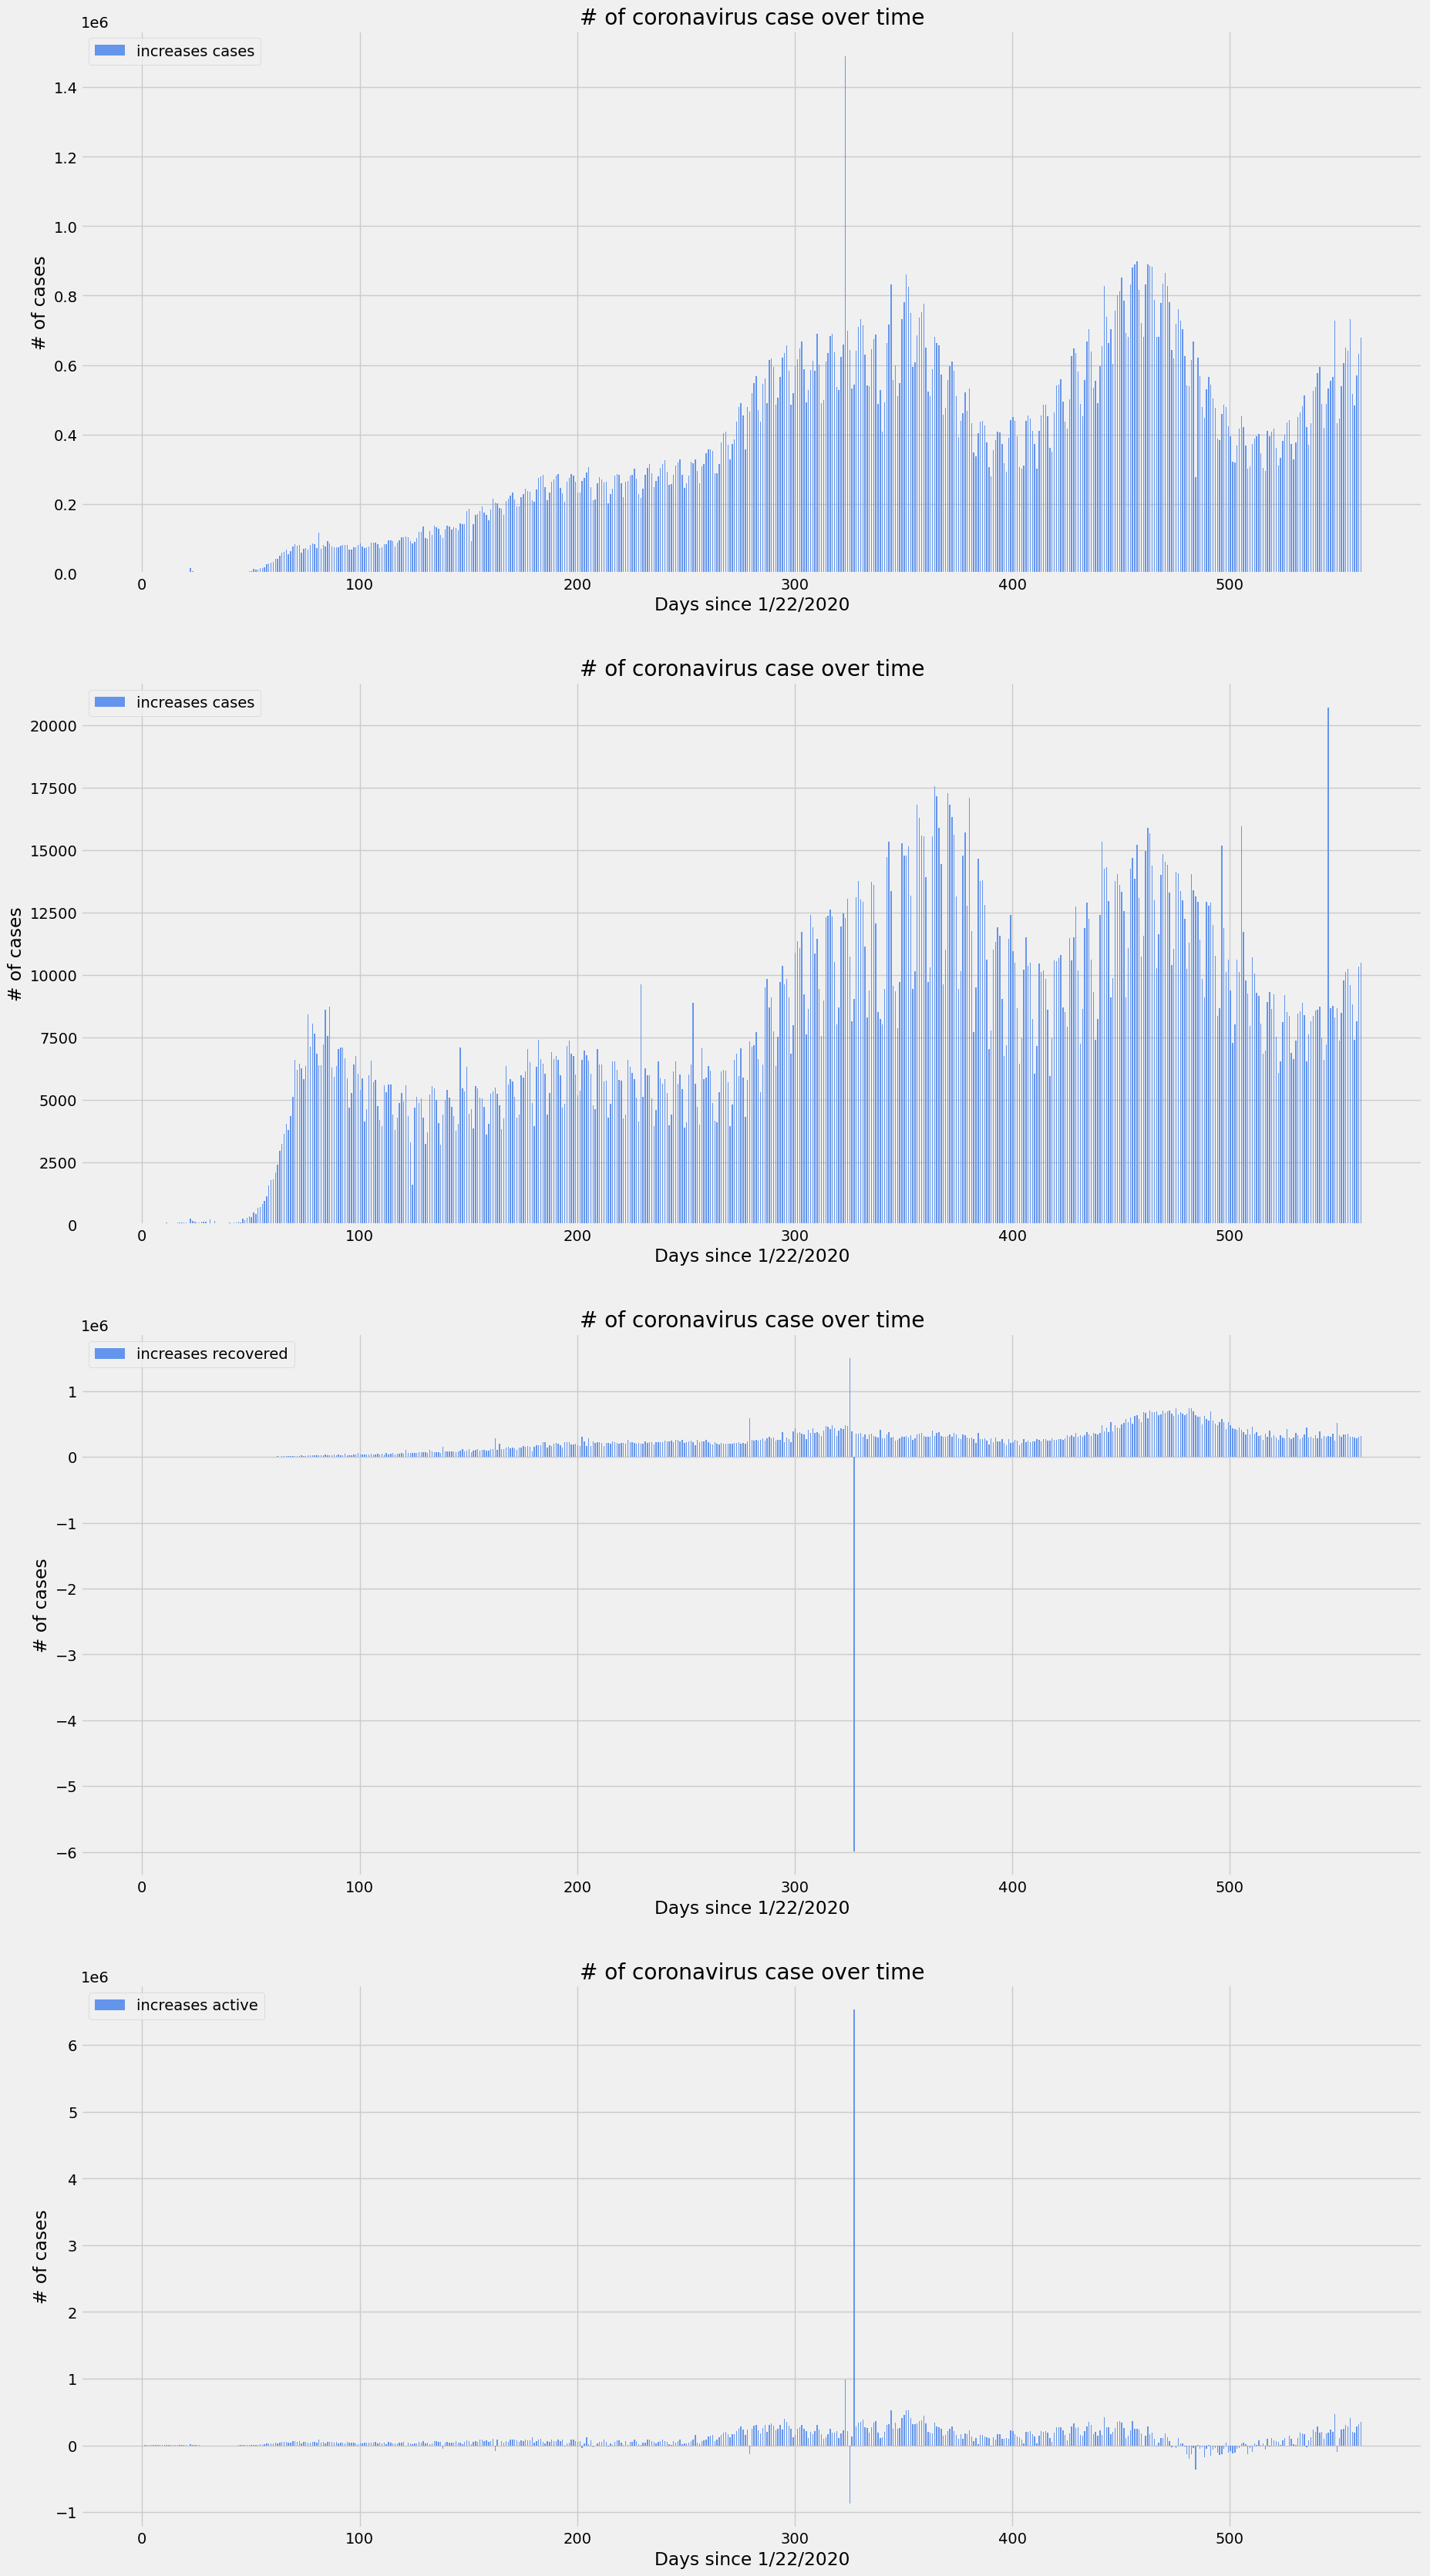

In [21]:
#Nhập mã lập trình của bạn tại đây:
fig, ax= plt.subplots(4, 1,figsize=[20, 10*4])

ax[0].bar(adjusted_dates,total_cases_increases,width=0.5,align='edge',color='#6495ED',label='increases cases')
ax[0].set(xlabel='Days since 1/22/2020',
       ylabel='# of cases',
       title='# of coronavirus case over time')
ax[0].legend(loc='upper left')

ax[1].bar(adjusted_dates,total_deaths_increases,width=0.5,align='edge',color='#6495ED',label='increases cases')
ax[1].set(xlabel='Days since 1/22/2020',
       ylabel='# of cases',
       title='# of coronavirus case over time')
ax[1].legend(loc='upper left')

ax[2].bar(adjusted_dates,total_recovered_increases,width=0.5,align='edge',color='#6495ED',label='increases recovered')
ax[2].set(xlabel='Days since 1/22/2020',
       ylabel='# of cases',
       title='# of coronavirus case over time')
ax[2].legend(loc='upper left')

ax[3].bar(adjusted_dates,total_active_increases,width=0.5,align='edge',color='#6495ED',label='increases active')
ax[3].set(xlabel='Days since 1/22/2020',
       ylabel='# of cases',
       title='# of coronavirus case over time')
ax[3].legend(loc='upper left')

# Bài toán 6:
    Tính tỷ lệ tử vong toàn cầu và tỷ lệ hồi phục theo phần trăm theo thời gian.

In [22]:
#Nhập mã lập trình của bạn tại đây:
mortality_rate=total_deaths/total_cases
recovered_rate=total_recovered/total_cases

# Bài toán 7
**7.1** 

    Trực quan hóa tỷ lệ tử vong theo thời gian (đơn vị ngày) bằng biểu đồ đường.

    Sử dụng đường gạch ngang để trực quan hóa tỷ lệ tử vong trung bình mọi lúc.

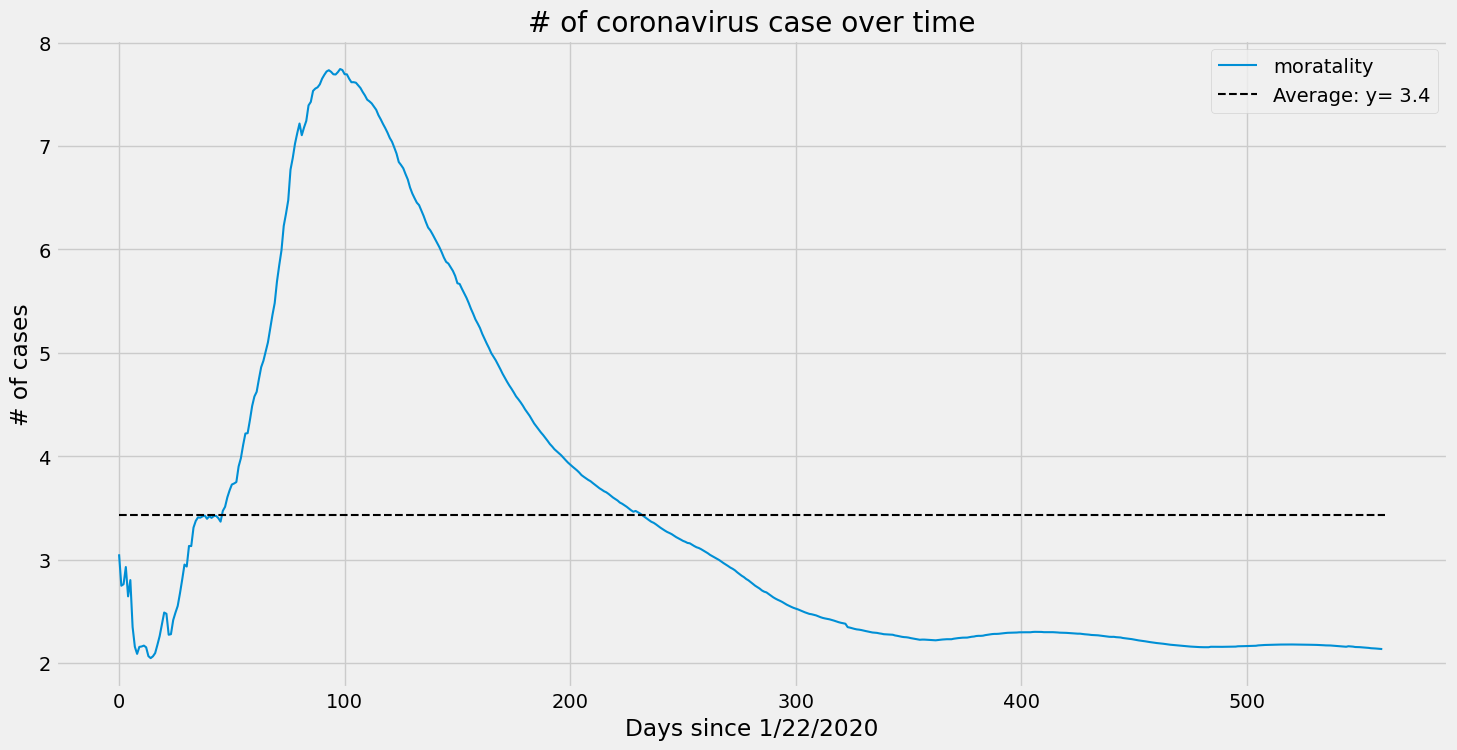

In [23]:
#Nhập mã lập trình của bạn tại đây:
fig, ax= plt.subplots(figsize=[16,8])

ax.plot(list(mortality_rate*100),linewidth=1.5, label='moratality')
ax.hlines(mortality_rate.mean()*100, 0, len(mortality_rate), linestyles='--', color='black', linewidth=1.5, label='Average: y= 3.4')
ax.set(xlabel='Days since 1/22/2020',
       ylabel='# of cases',
       title='# of coronavirus case over time')
ax.legend(loc='upper right')

**7.2** 

    Trực quan hóa tỷ lệ tử vong theo thời gian (đơn vị ngày) bằng biểu đồ đường.

    Sử dụng đường gạch ngang để trực quan hóa tỷ lệ tử vong trung bình mọi lúc.

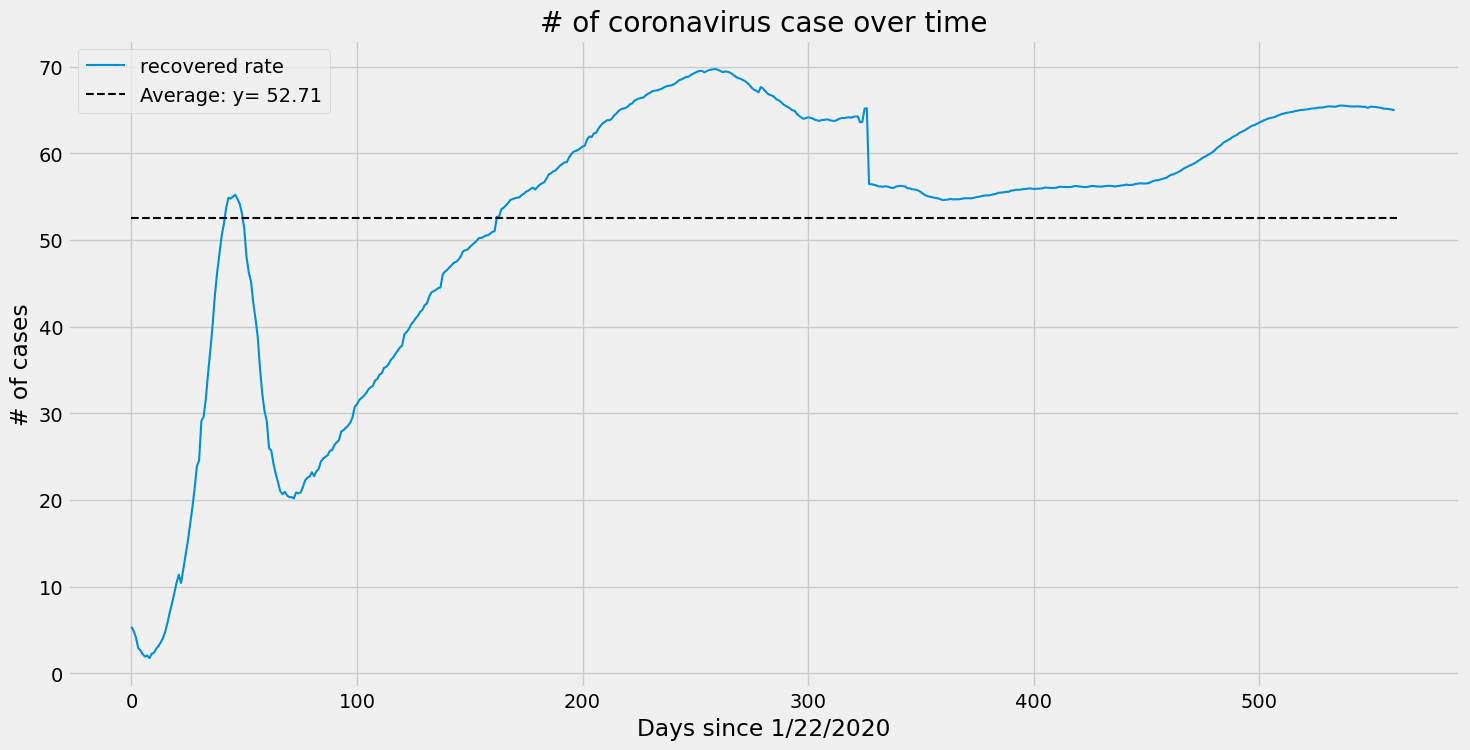

In [22]:
#Nhập mã lập trình của bạn tại đây:
fig, ax= plt.subplots(figsize=[16,8])

ax.plot(list(recovered_rate*100),linewidth=1.5, label='recovered rate')
ax.hlines(recovered_rate.mean()*100, 0, len(recovered_rate), linestyles='--', color='black', linewidth=1.5, label='Average: y= 52.71')
ax.set(xlabel='Days since 1/22/2020',
       ylabel='# of cases',
       title='# of coronavirus case over time')
ax.legend(loc='upper left')

#  5. Phân tích theo lục địa

## Tiền xử lý dữ liệu

In [32]:
# Changing the conuntry names as required by pycountry_convert Lib
confirmed_df.loc[confirmed_df['Country/Region'] == "US", "Country/Region"] = "USA"
deaths_df.loc[deaths_df['Country/Region'] == "US", "Country/Region"] = "USA"
recoveries_df.loc[recoveries_df['Country/Region'] == "US", "Country/Region"] = "USA"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
deaths_df.loc[deaths_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
recoveries_df.loc[recoveries_df['Country/Region'] == "Korea, South", "Country/Region"] = "South Korea"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
deaths_df.loc[deaths_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
recoveries_df.loc[recoveries_df['Country/Region'] == "Taiwan*", "Country/Region"] = "Taiwan"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Kinshasa)", "Country/Region"] = "Democratic Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
deaths_df.loc[deaths_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
recoveries_df.loc[recoveries_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"

confirmed_df.loc[confirmed_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
deaths_df.loc[deaths_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
recoveries_df.loc[recoveries_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Brazzaville)", "Country/Region"] = "Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
deaths_df.loc[deaths_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
recoveries_df.loc[recoveries_df['Country/Region'] == "Bahamas, The", "Country/Region"] = "Bahamas"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
deaths_df.loc[deaths_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
recoveries_df.loc[recoveries_df['Country/Region'] == "Gambia, The", "Country/Region"] = "Gambia"

# getting all countries
countries = np.asarray(confirmed_df["Country/Region"])
countries1 = np.asarray(deaths_df["Country/Region"])
countries2 = np.asarray(recoveries_df["Country/Region"])

# Continent_code to Continent_names
continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU' : 'Europe',
    'na' : 'Others'
}

# Defininng Function for getting continent code for country.
def country_to_continent_code(country):
    try:
        return pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country))
    except :
        return 'na'


# Bài toán 8
    Thêm trường "continent" vào tập dữ liệu confirm_df, death_df và recorveries_df:

In [33]:
#Nhập mã lập trình của bạn tại đây:
#del confirmed_df['continent']
confirmed_df.insert(2,'continent','')
for ct in confirmed_df.index:
    confirmed_df['continent'].values[ct]=continents[country_to_continent_code(confirmed_df['Country/Region'].values[ct])]


#del deaths_df['continent']
deaths_df.insert(2,'continent','')
for ct in deaths_df.index:
    deaths_df['continent'].values[ct]=continents[country_to_continent_code(deaths_df['Country/Region'].values[ct])]


#del recoveries_df['continent']
recoveries_df.insert(2,'continent','')
for ct in recoveries_df.index:
    recoveries_df['continent'].values[ct]=continents[country_to_continent_code(recoveries_df['Country/Region'].values[ct])]
recoveries_df

ValueError: cannot insert continent, already exists

# Bài toán 9
    Tạo khung dữ liệu country_df với chỉ mục là trường "Country/Region".
    Các thông tin cột này sẽ là:
    - continent: Lục địa của quốc gia.
    - Deaths: Tổng số ca dương tính.
    - Deaths: Tổng số người chết.
    - Recoveries: Tổng số ca hồi phục
    - Active: Tổng số đang điều trị.
    - Mortality Rate: Tỉ lệ tử vong tính theo phần trăm.

In [34]:
#Nhập mã lập trình của bạn tại đây:
country_df=pd.DataFrame()
country_df['Country/Region']=confirmed_df['Country/Region']
country_df['continent']=confirmed_df['continent']
country_df['Confirmed']=confirmed_df[list(confirmed_df.columns)[-1]]
country_df['Deaths']=deaths_df[list(deaths_df.columns)[-1]]
country_df['Recoveries']=recoveries_df[list(recoveries_df.columns)[-1]]
country_df['Active']=country_df['Confirmed']-country_df['Deaths']-country_df['Recoveries']
country_df['Mortality Rate']=country_df['Deaths']/country_df['Confirmed']*100
#country_df.set_index('Country/Region')
#del country_df.index
country_df.index=country_df['Country/Region']
del country_df['Country/Region']
country_df

continent  Confirmed  Deaths  Recoveries  Active  \
Country/Region                                                          
Afghanistan               Asia     148933    6836       82586   59511   
Albania                 Europe     133310    2457      130314     539   
Algeria                 Africa     176724    4404      118409   53911   
Andorra                 Europe      14797     128       14380     289   
Angola                  Africa      43158    1026       39582    2550   
...                        ...        ...     ...         ...     ...   
West Bank and Gaza      Others     317404    3609      312320    1475   
Winter Olympics 2022    Others          0       0           0       0   
Yemen                     Asia       7096    1380        4251    1465   
Zambia                  Africa     197791    3430      189658    4703   
Zimbabwe                Africa     113526    3711       82994   26821   

                      Mortality Rate  
Country/Region                        
Afghanistan                 4.589983  
Albania                     1.843073  
Algeria                     2.492021  
Andorra                     0.865040  
Angola                      2.377311  
...                              ...  
West Bank and Gaza          1.137037  
Winter Olympics 2022             NaN  
Yemen                      19.447576  
Zambia                      1.734154  
Zimbabwe                    3.268855  

[273 rows x 6 columns]

# Bài toán 10
    Tạo khung dữ liệu Continental_df với chỉ mục là trường "continent".
    Các thông tin cột này sẽ là:

     - Confirmed: Đất nước lục địa.
     - Deaths: Tổng số người chết.
     - Recoveries: Tổng số lần khôi phục.
     - Active: Tổng số đang điều trị.
     - Mortality Rate: Tỷ lệ tử vong tính theo phần trăm.

In [35]:
#Nhập mã lập trình của bạn tại đây:
Continental_df=country_df.groupby(['continent']).sum()
Continental_df['Mortality Rate']=Continental_df['Deaths']/Continental_df['Confirmed']*100
Continental_df

Confirmed   Deaths  Recoveries    Active  Mortality Rate
continent                                                              
Africa           6855602   174000     5955131    726471        2.538070
Asia            62536726   902952    57853343   3780431        1.443875
Australia          90000     1425       55290     33285        1.583333
Europe          52448545  1167140    27947075  23334330        2.225305
North America   40913157   897899     4370968  35644290        2.194646
Others            753558    16614      654615     82329        2.204741
South America   35722194  1096367    32656668   1969159        3.069148

## Biểu đồ đường mẫu
Dưới đây là các hàm mẫu để trực quan hóa các trường hợp sinh động theo thời gian ở mỗi châu lục / quốc gia:

In [36]:
def plot_params(ax,axis_label= None, plt_title = None,label_size=15, axis_fsize = 15, title_fsize = 20, scale = 'linear' ):
    # Tick-Parameters
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(which='both', width=1,labelsize=label_size)
    ax.tick_params(which='major', length=6)
    ax.tick_params(which='minor', length=3, color='0.8')
    
    # Grid
    plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
    plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

    # Plot Title
    plt.title( plt_title,{'fontsize':title_fsize})
    
    # Yaxis sacle
    plt.yscale(scale)
    plt.minorticks_on()
    # Plot Axes Labels
    xl = plt.xlabel(axis_label[0],fontsize = axis_fsize)
    yl = plt.ylabel(axis_label[1],fontsize = axis_fsize)
    
def visualize_covid_cases(confirmed, deaths,
                          continent=None , country = None , state = None, period = None, figure = None,
                          scale = "linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,10))
        # Sub plot
        ax = f.add_subplot(111)
    else :
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1],figure[2],figure[3])
    ax.set_axisbelow(True)
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)
    
    stats = [confirmed, deaths]
    label = ["Confirmed", "Deaths"]
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["country",country]
    else: 
        params = ["All", "All"]
    color = ["blue","red","green"]
    marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=4, markerfacecolor='#ffffff')
    for i,stat in enumerate(stats):
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:,5:]),axis = 0)[x:]
        else:
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")",color=color[i],**marker_style)
        plt.fill_between(date,cases,color=color[i],alpha=0.3)
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,5:]),axis = 0)[x:]
    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stats[0][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stats[1][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        
    text = stats[0].columns[5]+" to "+stats[0].columns[-1]+"\n"
    text += "Mortality rate : "+ str(int(Total_deaths[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
    text += "Last 5 Days:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-6])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-6])+"\n"
    text += "Last 24 Hours:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-2])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-2])+"\n"
    
    plt.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))
    
    # Plot Axes Labels
    axis_label = ["Days ("+confirmed_df.columns[5]+" - "+confirmed_df.columns[-1]+")","No of Cases"]
    
    # Plot Parameters
    plot_params(ax,axis_label,scale = scale)
    
    # Plot Title
    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':25})
    else:   
        plt.title("COVID-19: "+params[1] ,{'fontsize':25})
        
    # Legend Location
    l = plt.legend(loc= "best",fontsize = 15)
    
    if figure == None:
        plt.show()



# Bài toán 11
**11.1** 

  Áp dụng hàm visual_covid_case để hiển thị trực quan hóa về Covid của 7 lục địa trong 7 biểu đồ đường được riêng biệt. Thứ tự hiển thị được sắp xếp theo thứ tự giảm dần theo số ca được xác nhận.
    

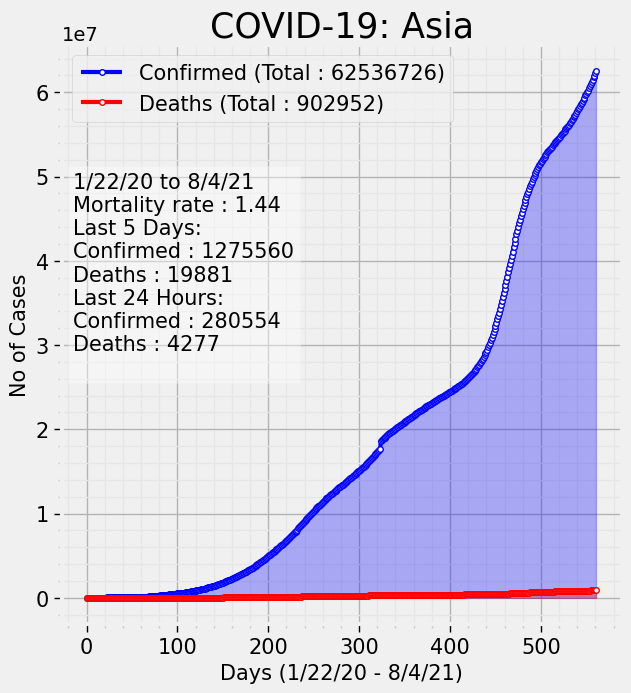

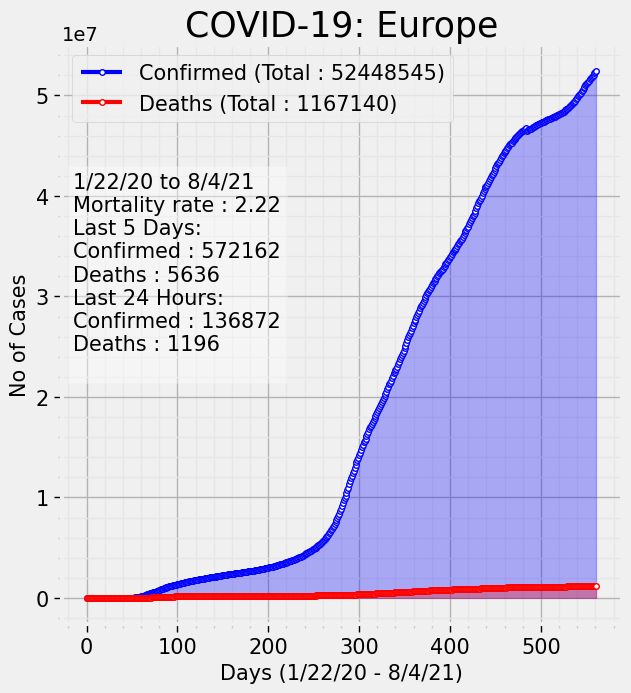

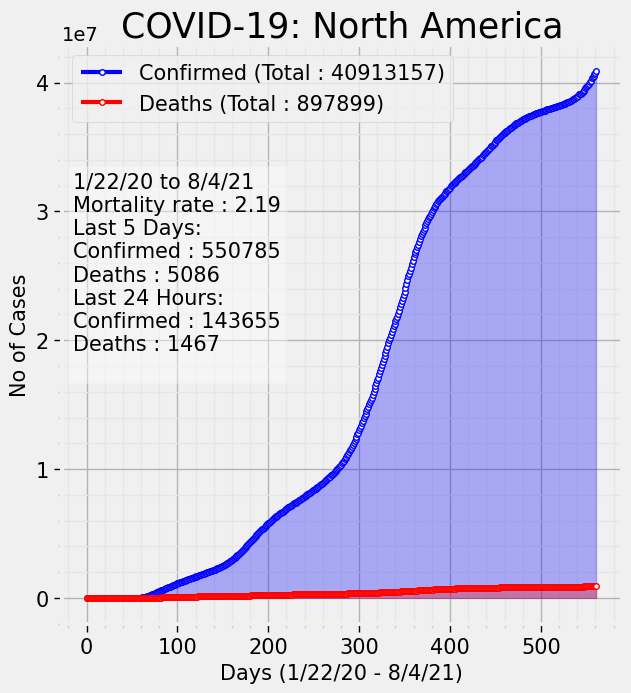

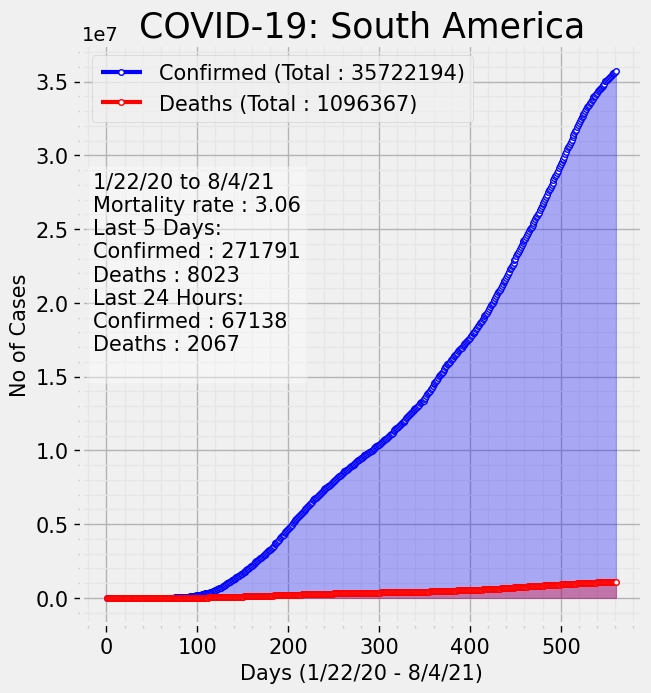

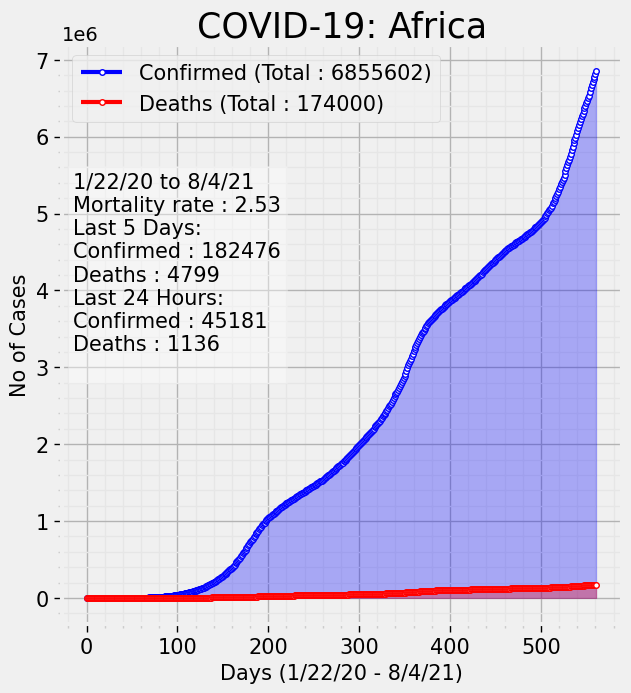

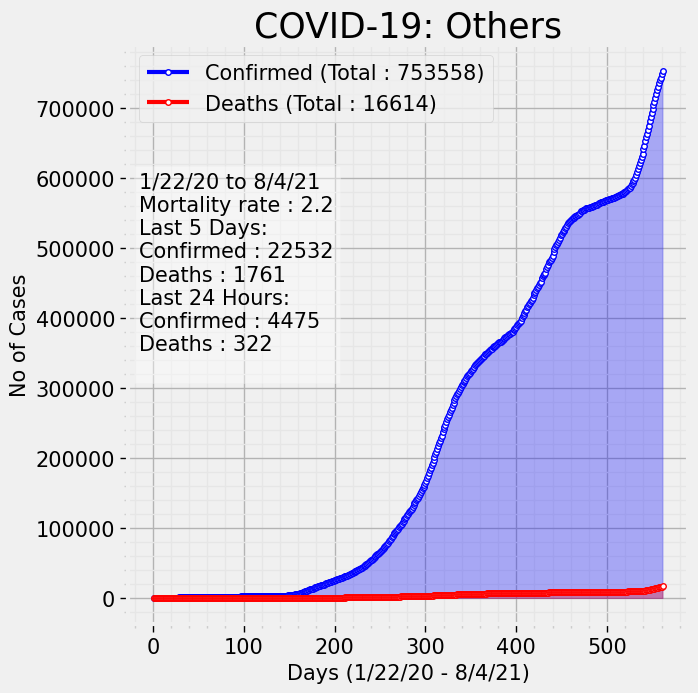

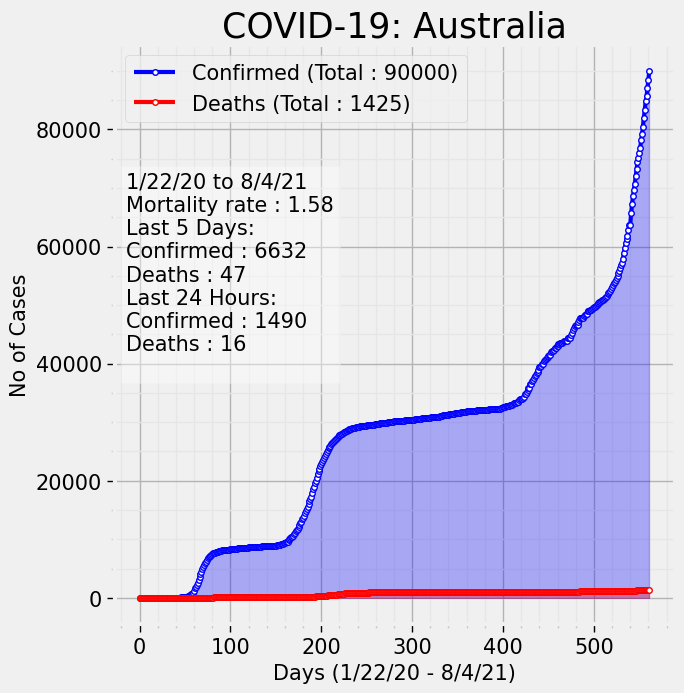

In [37]:
#Nhập mã lập trình của bạn tại đây:

sort_continent_confirmed=confirmed_df.groupby('continent').sum().sort_values(last_day_confirmed,ascending=False)

for continent in sort_continent_confirmed.index:
    visualize_covid_cases(confirmed_df, deaths_df,
                          continent= continent , country = None , state = None, period = None, figure = None,
                          scale = "linear")

In [38]:

def plot_params(ax,axis_label= None, plt_title = None,label_size=15, axis_fsize = 15, title_fsize = 20, scale = 'linear' ):
    # Tick-Parameters
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(which='both', width=1,labelsize=label_size)
    ax.tick_params(which='major', length=6)
    ax.tick_params(which='minor', length=3, color='0.8')
    
    # Grid
    plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
    plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

    # Plot Title
    plt.title( plt_title,{'fontsize':title_fsize})
    
    # Yaxis sacle
    plt.yscale(scale)
    plt.minorticks_on()
    # Plot Axes Labels
    xl = plt.xlabel(axis_label[0],fontsize = axis_fsize)
    yl = plt.ylabel(axis_label[1],fontsize = axis_fsize)
    
def visualize_covid_cases(confirmed, deaths, recoveries,
                          continent=None , country = None , state = None, period = None, figure = None,
                          scale = "linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,10))
        # Sub plot
        ax = f.add_subplot(111)
    else :
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1],figure[2],figure[3])
    ax.set_axisbelow(True)
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)
    
    stats = [confirmed, deaths, recoveries]
    label = ["Confirmed", "Deaths", "Recoveries"]
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["country",country]
    else: 
        params = ["All", "All"]
    color = ["blue","red","green"]
    marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=4, markerfacecolor='#ffffff')
    for i,stat in enumerate(stats):
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:,5:]),axis = 0)[x:]
        else:
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")",color=color[i],**marker_style)
        plt.fill_between(date,cases,color=color[i],alpha=0.3)
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,5:]),axis = 0)[x:]
    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stats[0][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stats[1][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        
    text = stats[0].columns[5]+" to "+stats[0].columns[-1]+"\n"
    text += "Mortality rate : "+ str(int(Total_deaths[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
    text += "Last 7 Days:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-8])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-6])+"\n"
    text += "Last 24 Hours:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-2])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-2])+"\n"
    
    plt.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))
    
    # Plot Axes Labels
    axis_label = ["Days ("+confirmed_df.columns[7]+" - "+confirmed_df.columns[-1]+")","No of Cases"]
    
    # Plot Parameters
    plot_params(ax,axis_label,scale = scale)
    
    # Plot Title
    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':25})
    else:   
        plt.title("COVID-19: "+params[1] ,{'fontsize':25})
        
    # Legend Location
    l = plt.legend(loc= "best",fontsize = 15)
    
    if figure == None:
        plt.show()


**11.2**

    Sử đổi "plot_params" và hàm "visualize_covid_cases" để: 
    - Hiển thị kết quả của 7 ngày gần nhất thay vì 5 ngày.
     - Thêm "Recoveries line" vào biểu đồ chính.
     - Thêm số "Total Recoveries" vào bảng nhỏ.
     - Thêm "Recoveries" được nộp trong 7 ngày và 24 giờ qua vào menu thông tin.

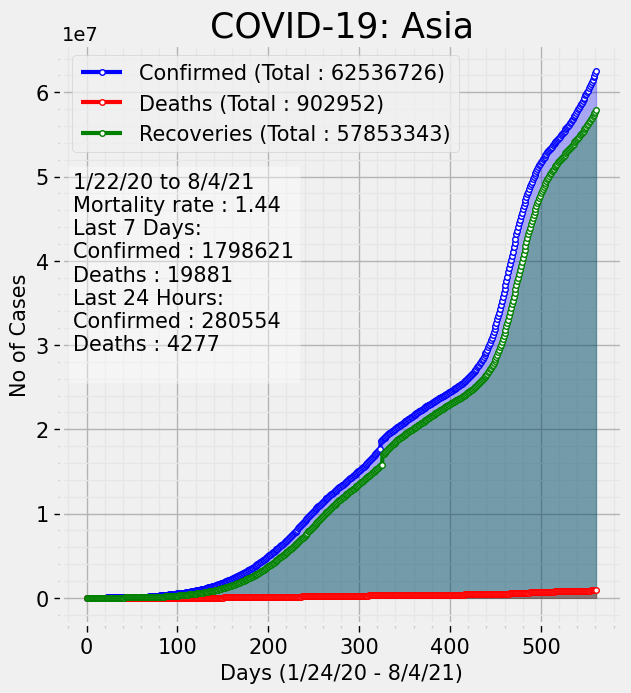

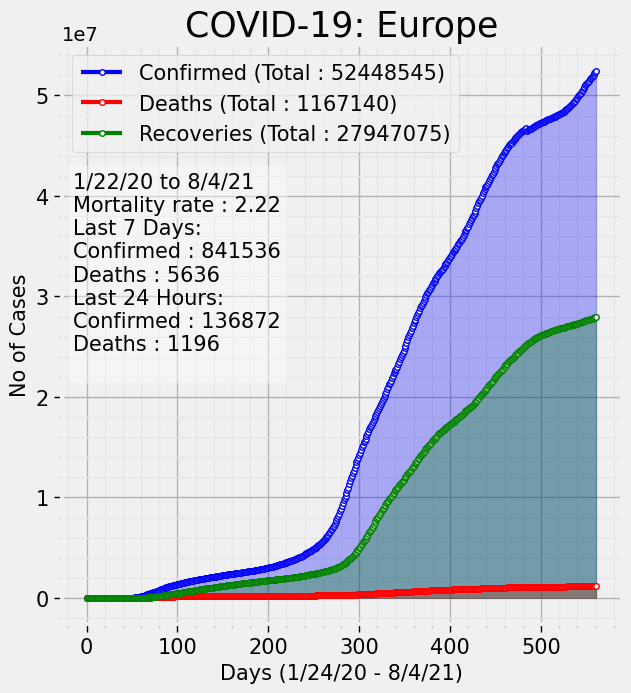

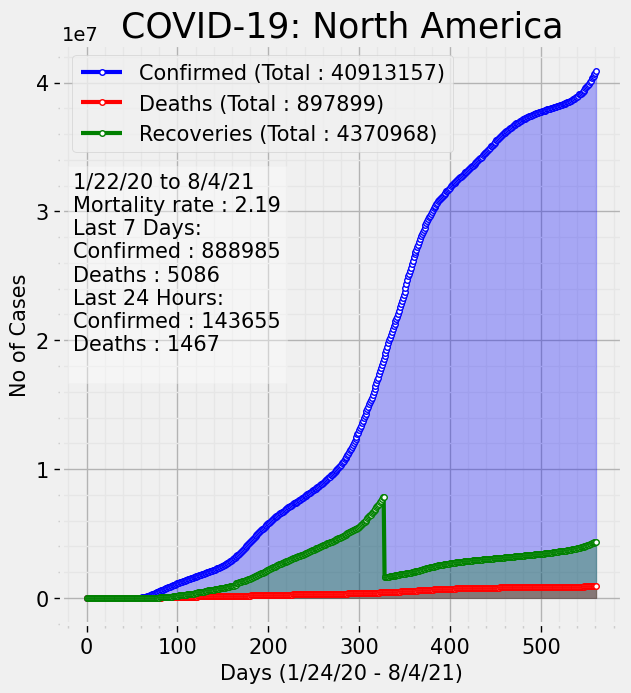

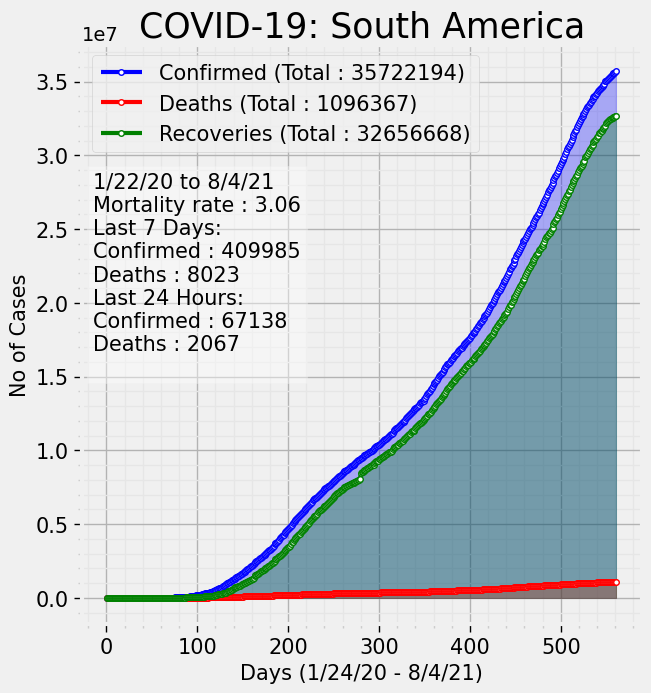

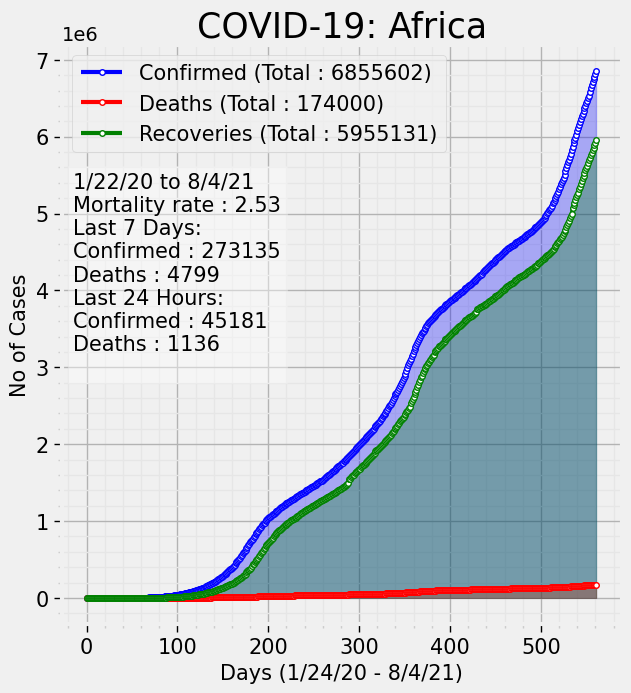

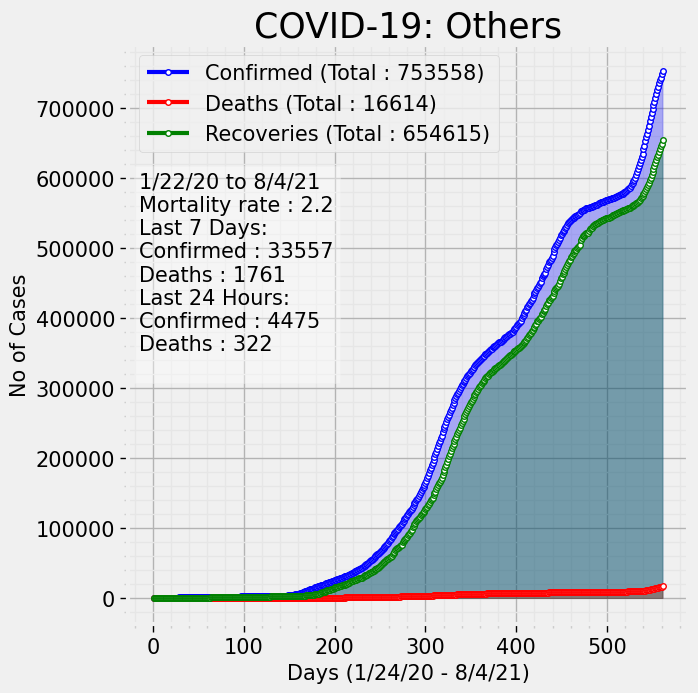

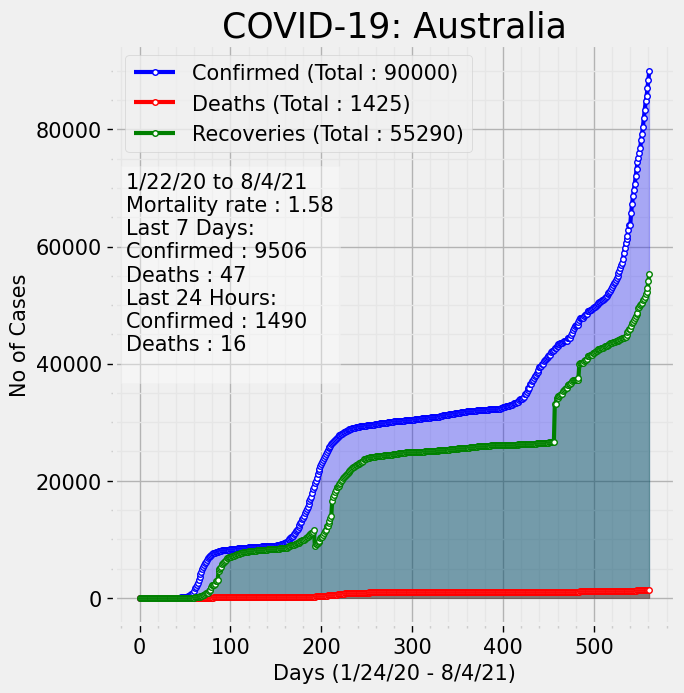

In [39]:
#Nhập mã lập trình của bạn tại đây:

sort_continent_confirmed=confirmed_df.groupby('continent').sum().sort_values(last_day_confirmed,ascending=False)

for continent in sort_continent_confirmed.index:
    visualize_covid_cases(confirmed_df, deaths_df, recoveries_df,
                          continent= continent , country = None , state = None, period = None, figure = None,
                          scale = "linear")

# Bài toán 12
    Trực quan hóa ma trận hiệp phương sai cho continents_df.

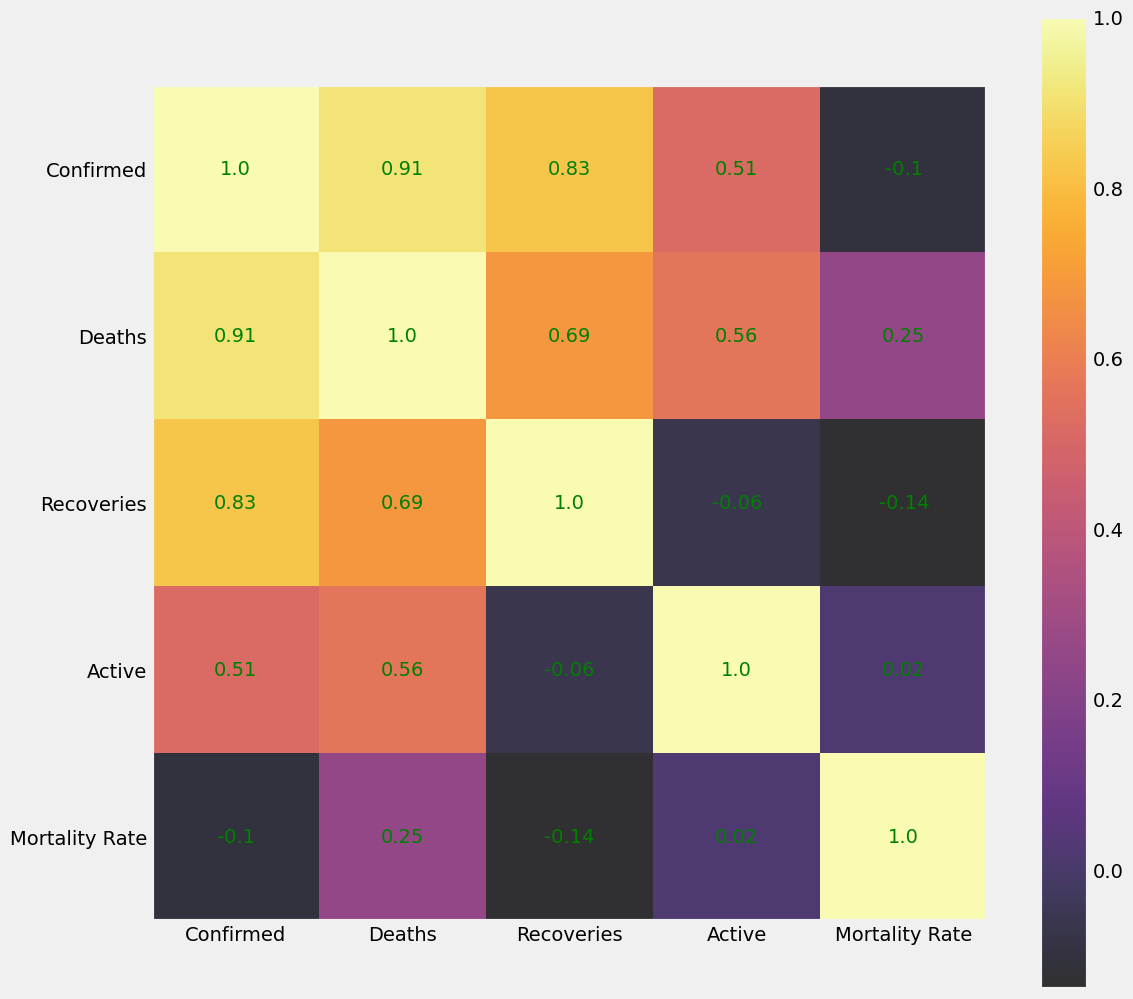

In [40]:
#Nhập mã lập trình của bạn tại đây:

correlation_continental=Continental_df.corr()
fig, ax = plt.subplots(figsize=[12, 12])
vmin = correlation_continental.min().min()
vmax = correlation_continental.max().max()
correlation_continental_plt=ax.imshow(correlation_continental,cmap='inferno',interpolation=None,alpha=0.8,vmin=vmin,vmax=vmax,origin='upper')
plt.colorbar(correlation_continental_plt)

plt.xticks(np.arange(len(correlation_continental.columns)), correlation_continental.columns)
plt.yticks(np.arange(len(correlation_continental.index)), correlation_continental.index)

for i in range(len(correlation_continental.index)):
    for j in range(len(correlation_continental.columns)):
        plt.text(j, i, round(correlation_continental.iloc[i,j],2), ha="center", va="center", color="g")
plt.grid()

# Bài toán 13
    Xây dựng biểu đồ hình tròn để so sánh tỷ lệ số ca dương tính, số người chết, số người khỏi bệnh và đang điều trị của 7 lục địa.
    Mỗi trường (xác nhận, tử vong, ...) nên được trình bày trong các biểu đồ hình tròn khác nhau.
    Bạn không được phép sử dụng đoạn mã lặp lại ở đây, hãy thử sử dụng vòng lặp for.
    Mỗi lục địa nên được trình bày bằng các màu sắc khác nhau.

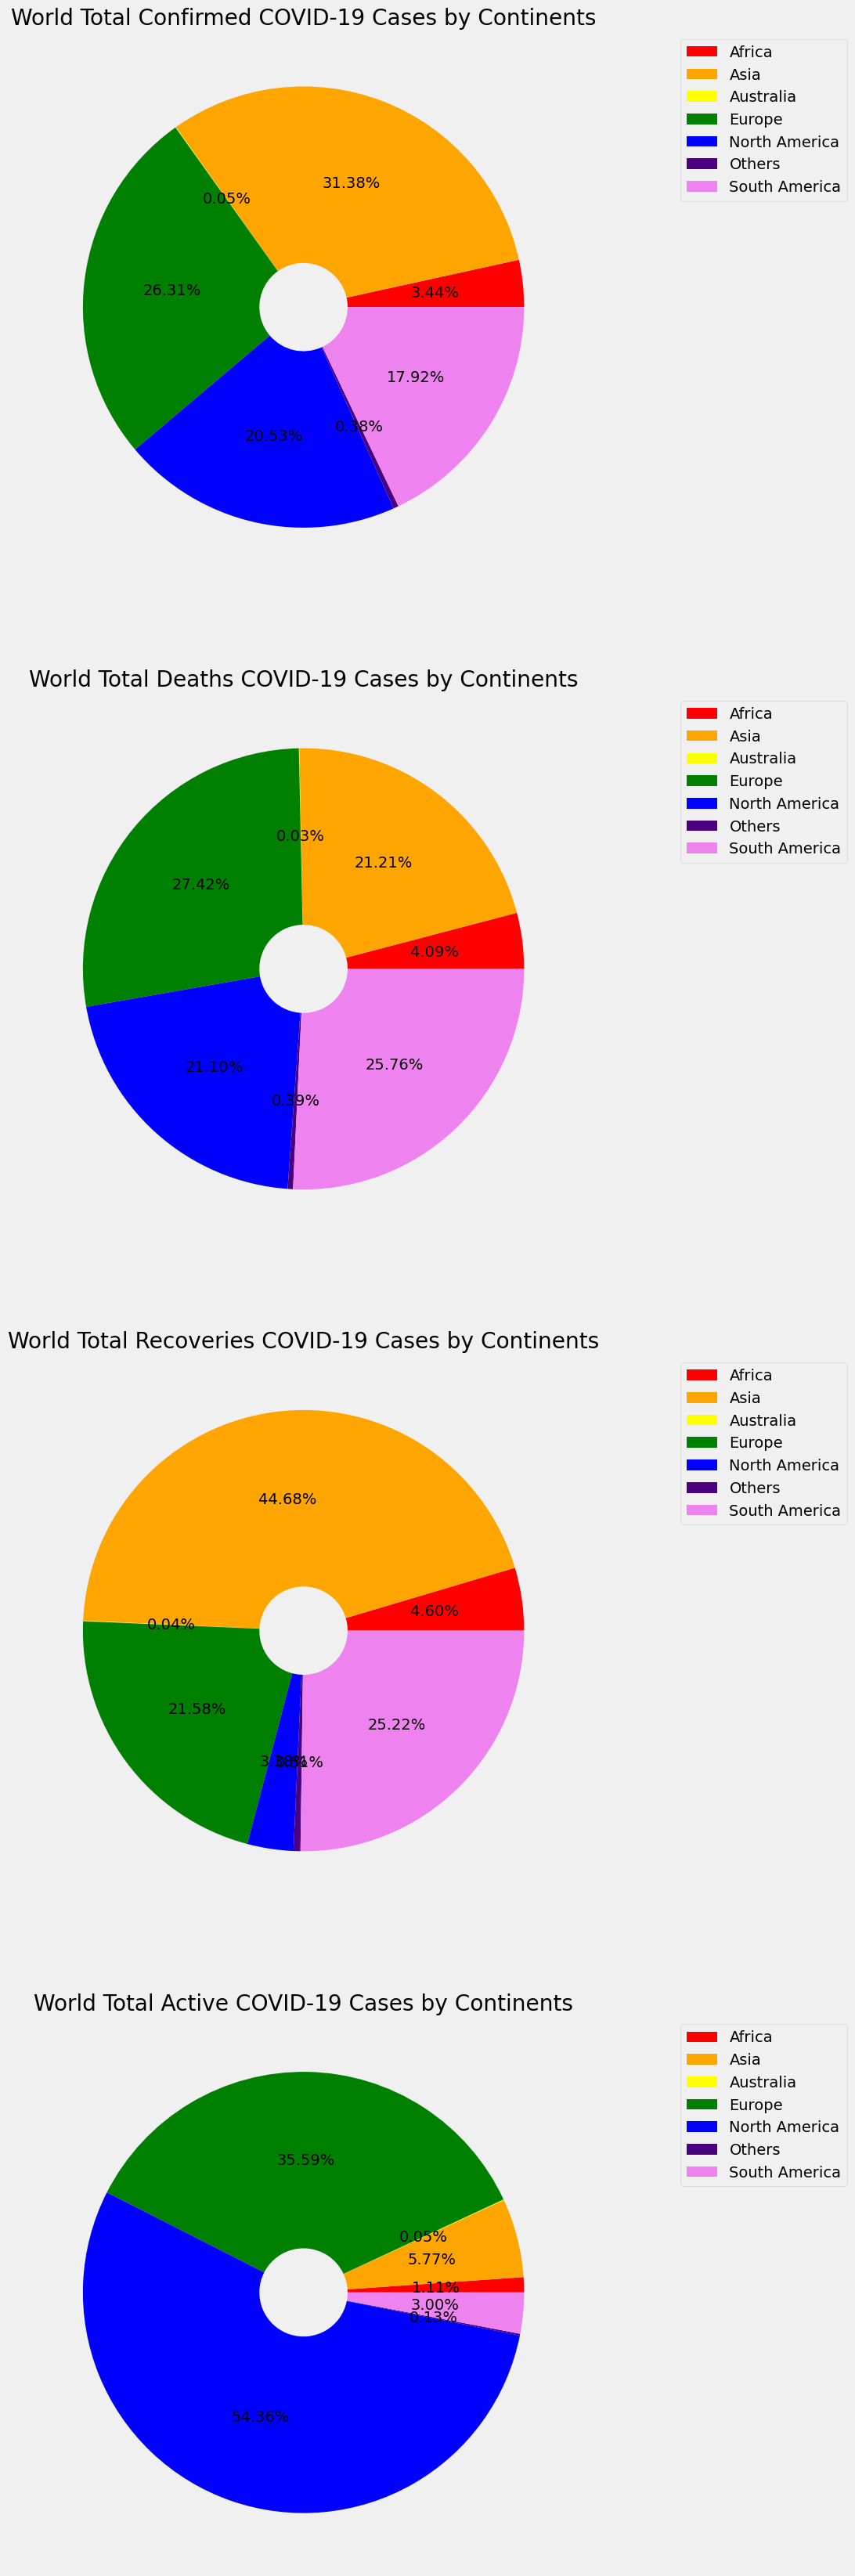

In [41]:
#Nhập mã lập trình của bạn tại đây:

fig, ax = plt.subplots(4,1,figsize=[10, 10*4])

ax[0].pie(Continental_df['Confirmed'], wedgeprops=dict(width=0.8),autopct=lambda x: "{:.2f}%".format(x)
          ,colors=['red','orange','yellow','green','blue','indigo','violet'],counterclock=True);
ax[0].legend(Continental_df.index,bbox_to_anchor=(1, 0, 0.5, 1))
ax[0].set_title('World Total Confirmed COVID-19 Cases by Continents')

ax[1].pie(Continental_df['Deaths'], wedgeprops=dict(width=0.8),autopct=lambda x: "{:.2f}%".format(x)
          ,colors=['red','orange','yellow','green','blue','indigo','violet'],counterclock=True);
ax[1].legend(Continental_df.index,bbox_to_anchor=(1, 0, 0.5, 1))
ax[1].set_title('World Total Deaths COVID-19 Cases by Continents')

ax[2].pie(Continental_df['Recoveries'], wedgeprops=dict(width=0.8),autopct=lambda x: "{:.2f}%".format(x)
          ,colors=['red','orange','yellow','green','blue','indigo','violet'],counterclock=True);
ax[2].legend(Continental_df.index,bbox_to_anchor=(1, 0, 0.5, 1))
ax[2].set_title('World Total Recoveries COVID-19 Cases by Continents')

ax[3].pie(Continental_df['Active'], wedgeprops=dict(width=0.8),autopct=lambda x: "{:.2f}%".format(x)
          ,colors=['red','orange','yellow','green','blue','indigo','violet'],counterclock=True);
ax[3].legend(Continental_df.index,bbox_to_anchor=(1, 0, 0.5, 1))
ax[3].set_title('World Total Active COVID-19 Cases by Continents')

plt.show()

In [ ]:
#Nhập mã lập trình của bạn tại đây:


# 6. Phân tích theo quốc gia

# Bài toán 14
    Xây dựng bản đồ folium để hiển thị số người được xác nhận, tử vong, phục hồi và tỷ lệ tử vong của mỗi quốc gia dựa trên vị trí của các quốc gia. Bán kính của hình tròn tỷ lệ thuận với số lượng xác nhận.
![title](problem14.png)

In [42]:
country_loc_df=country_df.reset_index()
country_loc_df['Lat']=confirmed_df['Lat']
country_loc_df['Long']=confirmed_df['Long']
country_loc_df

Country/Region continent  Confirmed  Deaths  Recoveries  Active  \
0             Afghanistan      Asia     148933    6836       82586   59511   
1                 Albania    Europe     133310    2457      130314     539   
2                 Algeria    Africa     176724    4404      118409   53911   
3                 Andorra    Europe      14797     128       14380     289   
4                  Angola    Africa      43158    1026       39582    2550   
..                    ...       ...        ...     ...         ...     ...   
268    West Bank and Gaza    Others     317404    3609      312320    1475   
269  Winter Olympics 2022    Others          0       0           0       0   
270                 Yemen      Asia       7096    1380        4251    1465   
271                Zambia    Africa     197791    3430      189658    4703   
272              Zimbabwe    Africa     113526    3711       82994   26821   

     Mortality Rate        Lat        Long  
0          4.589983  33.939110   67.709953  
1          1.843073  41.153300   20.168300  
2          2.492021  28.033900    1.659600  
3          0.865040  42.506300    1.521800  
4          2.377311 -11.202700   17.873900  
..              ...        ...         ...  
268        1.137037  31.952200   35.233200  
269             NaN  39.904200  116.407400  
270       19.447576  15.552727   48.516388  
271        1.734154 -13.133897   27.849332  
272        3.268855 -19.015438   29.154857  

[273 rows x 9 columns]

In [43]:
country_loc_df
m = folium.Map()
point_layer = folium.map.FeatureGroup()
for i in country_loc_df.index:
    long = country_loc_df['Long'][i]
    lat = country_loc_df['Lat'][i]
    Confirmed_radius = float((country_loc_df['Confirmed'][i])/1000000)
    z=lambda x: "{:.2f}".format(x)
    m_r=z(country_loc_df['Mortality Rate'][i])
    txt='***%s*** \n - Confirmed: %s \n - Deaths: %s \n - Recoveries: %s \n - Mortality Rate: %s'%(country_loc_df['Country/Region'][i],country_loc_df['Confirmed'][i],country_loc_df['Deaths'][i],country_loc_df['Recoveries'][i],m_r)
    if pd.notnull(long) & pd.notnull(lat):
        circle_coutry = folium.CircleMarker(location=[lat,long], radius=Confirmed_radius,color='orange', fill_color='orange', popup=txt)
    point_layer.add_child(circle_coutry).add_to(m)
m

In [ ]:
#Nhập mã lập trình của bạn tại đây:

# Bài toán 15
Xây dựng một bản đồ px [(plotly.express)](https://plotly.com/python/plotly-express/) để hiển thị số lượng hoạt động của mỗi quốc gia trong log(10) dựa trên tên của các quốc gia bằng cách sử dụng màu "spectral" (quang phổ).

In [45]:
country_loc_df=country_df.reset_index()
country_loc_df['Lat']=confirmed_df['Lat']
country_loc_df['Long']=confirmed_df['Long']
country_loc_df

Country/Region continent  Confirmed  Deaths  Recoveries  Active  \
0             Afghanistan      Asia     148933    6836       82586   59511   
1                 Albania    Europe     133310    2457      130314     539   
2                 Algeria    Africa     176724    4404      118409   53911   
3                 Andorra    Europe      14797     128       14380     289   
4                  Angola    Africa      43158    1026       39582    2550   
..                    ...       ...        ...     ...         ...     ...   
268    West Bank and Gaza    Others     317404    3609      312320    1475   
269  Winter Olympics 2022    Others          0       0           0       0   
270                 Yemen      Asia       7096    1380        4251    1465   
271                Zambia    Africa     197791    3430      189658    4703   
272              Zimbabwe    Africa     113526    3711       82994   26821   

     Mortality Rate        Lat        Long  
0          4.589983  33.939110   67.709953  
1          1.843073  41.153300   20.168300  
2          2.492021  28.033900    1.659600  
3          0.865040  42.506300    1.521800  
4          2.377311 -11.202700   17.873900  
..              ...        ...         ...  
268        1.137037  31.952200   35.233200  
269             NaN  39.904200  116.407400  
270       19.447576  15.552727   48.516388  
271        1.734154 -13.133897   27.849332  
272        3.268855 -19.015438   29.154857  

[273 rows x 9 columns]

In [46]:
#'Bolivia' = 'Bolivia, Plurinational State of'
country_loc_df.loc[country_loc_df['Country/Region']=='Bolivia','Country/Region'] = 'Bolivia, Plurinational State of'

#'Brunei' = 'Brunei Darussalam'
country_loc_df.loc[country_loc_df['Country/Region']=='Brunei','Country/Region'] = 'Brunei Darussalam'

#'Burma' = 'Myanmar'
country_loc_df.loc[country_loc_df['Country/Region']=='Burma','Country/Region'] = 'Myanmar'

#'Cabo Verde' = 'Cape Verde'
country_loc_df.loc[country_loc_df['Country/Region']=='Cabo Verde','Country/Region'] = 'Cape Verde'

#'Republic of the Congo' = 'Congo'
country_loc_df.loc[country_loc_df['Country/Region']=='Republic of the Congo','Country/Region'] = 'Congo'

#'Democratic Republic of the Congo' = 'Congo, the Democratic Republic of the'
country_loc_df.loc[country_loc_df['Country/Region']=='Democratic Republic of the Congo','Country/Region'] = 'Congo, the Democratic Republic of the'

#'Czechia' = 'Czech Republic'
country_loc_df.loc[country_loc_df['Country/Region']=='Czechia','Country/Region'] = 'Czech Republic'

#'Eswatini' = 'Swaziland'
country_loc_df.loc[country_loc_df['Country/Region']=='Eswatini','Country/Region'] = 'Swaziland'

#'Holy See' = 'Holy See (Vatican City State)'
country_loc_df.loc[country_loc_df['Country/Region']=='Holy See','Country/Region'] = 'Holy See (Vatican City State)'

#'Iran' = 'Iran, Islamic Republic of'
country_loc_df.loc[country_loc_df['Country/Region']=='Iran','Country/Region'] = 'Iran, Islamic Republic of'

#'Korea, North' = 'Korea, Democratic People's Republic of'
country_loc_df.loc[country_loc_df['Country/Region']=='Korea, North','Country/Region'] = "Korea, Democratic People's Republic of"

#'South Korea' = 'Korea, Republic of'
country_loc_df.loc[country_loc_df['Country/Region']=='South Korea','Country/Region'] = 'Korea, Republic of'

#'Laos' = 'Lao People's Democratic Republic'
country_loc_df.loc[country_loc_df['Country/Region']=='Laos','Country/Region'] = "Lao People's Democratic Republic"

#'Libya' = 'Libyan Arab Jamahiriya'
country_loc_df.loc[country_loc_df['Country/Region']=='Libya','Country/Region'] = 'Libyan Arab Jamahiriya'

#'Micronesia' = 'Micronesia, Federated States of'
country_loc_df.loc[country_loc_df['Country/Region']=='Micronesia','Country/Region'] = 'Micronesia, Federated States of'

#'Moldova' = 'Moldova, Republic of'
country_loc_df.loc[country_loc_df['Country/Region']=='Moldova','Country/Region'] = 'Moldova, Republic of'

#'North Macedonia' = 'Macedonia, the former Yugoslav Republic of'
country_loc_df.loc[country_loc_df['Country/Region']=='North Macedonia','Country/Region'] = 'Macedonia, the former Yugoslav Republic of'

#'Russia' = 'Russian Federation'
country_loc_df.loc[country_loc_df['Country/Region']=='Libya','Country/Region'] = 'Libyan Arab Jamahiriya'

#'Syria' = 'Syrian Arab Republic'
country_loc_df.loc[country_loc_df['Country/Region']=='Syria','Country/Region'] = 'Syrian Arab Republic'

#'Taiwan' = 'Taiwan, Province of China'
country_loc_df.loc[country_loc_df['Country/Region']=='Taiwan','Country/Region'] = 'Taiwan, Province of China'

#'Tanzania' = 'Tanzania, United Republic of'
country_loc_df.loc[country_loc_df['Country/Region']=='Tanzania','Country/Region'] = 'Tanzania, United Republic of'

#'USA' = 'United States'
country_loc_df.loc[country_loc_df['Country/Region']=='USA','Country/Region'] = 'United States'

#'Venezuela' = 'Venezuela, Bolivarian Republic of'
country_loc_df.loc[country_loc_df['Country/Region']=='Venezuela','Country/Region'] = 'Venezuela, Bolivarian Republic of'

#'Vietnam' = 'Viet Nam'
country_loc_df.loc[country_loc_df['Country/Region']=='Vietnam','Country/Region'] = 'Viet Nam'

#'Russia' = 'Russian Federation'
country_loc_df.loc[country_loc_df['Country/Region']=='Russia','Country/Region'] = 'Russian Federation'



In [47]:
iso_alpha_df = pd.read_csv('https://gist.githubusercontent.com/radcliff/f09c0f88344a7fcef373/raw/2753c482ad091c54b1822288ad2e4811c021d8ec/wikipedia-iso-country-codes.csv')
iso_alpha_df

English short name lower case Alpha-2 code Alpha-3 code  Numeric code  \
0                     Afghanistan           AF          AFG             4   
1                   Åland Islands           AX          ALA           248   
2                         Albania           AL          ALB             8   
3                         Algeria           DZ          DZA            12   
4                  American Samoa           AS          ASM            16   
..                            ...          ...          ...           ...   
241             Wallis and Futuna           WF          WLF           876   
242                Western Sahara           EH          ESH           732   
243                         Yemen           YE          YEM           887   
244                        Zambia           ZM          ZMB           894   
245                      Zimbabwe           ZW          ZWE           716   

        ISO 3166-2  
0    ISO 3166-2:AF  
1    ISO 3166-2:AX  
2    ISO 3166-2:AL  
3    ISO 3166-2:DZ  
4    ISO 3166-2:AS  
..             ...  
241  ISO 3166-2:WF  
242  ISO 3166-2:EH  
243  ISO 3166-2:YE  
244  ISO 3166-2:ZM  
245  ISO 3166-2:ZW  

[246 rows x 5 columns]

In [48]:
country_loc_df=country_loc_df.merge(iso_alpha_df, left_on="Country/Region", right_on="English short name lower case", how="left")

In [49]:
country_loc_df.insert(6,'log10(Active)','')

In [51]:
country_loc_df['log10(Active)']=np.log10(country_loc_df['Active'])

In [54]:
fig = px.choropleth(country_loc_df, locations="Alpha-3 code", color='log10(Active)', hover_data=["Alpha-3 code","Country/Region","Active"], hover_name="Country/Region"
                    , title='Active cases heat map', color_continuous_scale="spectral"
                   , labels={'Alpha-3 code':'Alpha-3 code'}
                   )
fig.show()

In [ ]:
#Nhập mã lập trình của bạn tại đây:

errot: Korea, North
errot: Summer Olympics 2020
errot: Winter Olympics 2022


/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning:

divide by zero encountered in log10

/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning:

invalid value encountered in log10



# Bài toán 16
    Lọc 10 quốc gia hàng đầu dựa trên số ca dương tính.

In [68]:
country_loc_df

Country/Region continent  Confirmed  Deaths  Recoveries  Active  \
0             Afghanistan      Asia     148933    6836       82586   59511   
1                 Albania    Europe     133310    2457      130314     539   
2                 Algeria    Africa     176724    4404      118409   53911   
3                 Andorra    Europe      14797     128       14380     289   
4                  Angola    Africa      43158    1026       39582    2550   
..                    ...       ...        ...     ...         ...     ...   
268    West Bank and Gaza    Others     317404    3609      312320    1475   
269  Winter Olympics 2022    Others          0       0           0       0   
270                 Yemen      Asia       7096    1380        4251    1465   
271                Zambia    Africa     197791    3430      189658    4703   
272              Zimbabwe    Africa     113526    3711       82994   26821   

     log10(Active)  Mortality Rate        Lat        Long  \
0         4.774597        4.589983  33.939110   67.709953   
1         2.731589        1.843073  41.153300   20.168300   
2         4.731677        2.492021  28.033900    1.659600   
3         2.460898        0.865040  42.506300    1.521800   
4         3.406540        2.377311 -11.202700   17.873900   
..             ...             ...        ...         ...   
268       3.168792        1.137037  31.952200   35.233200   
269           -inf             NaN  39.904200  116.407400   
270       3.165838       19.447576  15.552727   48.516388   
271       3.672375        1.734154 -13.133897   27.849332   
272       4.428475        3.268855 -19.015438   29.154857   

    English short name lower case Alpha-2 code Alpha-3 code  Numeric code  \
0                     Afghanistan           AF          AFG           4.0   
1                         Albania           AL          ALB           8.0   
2                         Algeria           DZ          DZA          12.0   
3                         Andorra           AD          AND          20.0   
4                          Angola           AO          AGO          24.0   
..                            ...          ...          ...           ...   
268                           NaN          NaN          NaN           NaN   
269                           NaN          NaN          NaN           NaN   
270                         Yemen           YE          YEM         887.0   
271                        Zambia           ZM          ZMB         894.0   
272                      Zimbabwe           ZW          ZWE         716.0   

        ISO 3166-2  
0    ISO 3166-2:AF  
1    ISO 3166-2:AL  
2    ISO 3166-2:DZ  
3    ISO 3166-2:AD  
4    ISO 3166-2:AO  
..             ...  
268            NaN  
269            NaN  
270  ISO 3166-2:YE  
271  ISO 3166-2:ZM  
272  ISO 3166-2:ZW  

[273 rows x 15 columns]

In [69]:
country_loc_top10_df=country_loc_df.sort_values('Confirmed', ascending=False).head(10)

In [ ]:
#Nhập mã lập trình của bạn tại đây:

continent  Confirmed  Deaths  Recoveries    Active  \
Country/Region                                                           
USA             North America   35460776  611222           0  34849554   
India                    Asia   31812114  426290    30974748    411076   
Brazil          South America   20034407  559944    17771228   1703235   
Russia                 Europe    6274006  159032     5609682    505292   
France                 Europe    6272466  112245      415111   5745110   
United Kingdom         Europe    5980830  157209       24693   5798928   
Turkey                   Asia    5822487   51767     5478185    292535   
Argentina       South America    4975616  106747     4615834    253035   
Colombia        South America    4815063  121695     4615354     78014   
Spain                  Europe    4545184   81844      150376   4312964   

                Mortality Rate        Lat        Long  
Country/Region                                         
USA                       1.72  40.000000 -100.000000  
India                     1.34  20.593684   78.962880  
Brazil                    2.79 -14.235000  -51.925300  
Russia                    2.53  61.524010  105.318756  
France                    1.79   6.425300   -9.839634  
United Kingdom            2.63  22.424560  -42.022004  
Turkey                    0.89  38.963700   35.243300  
Argentina                 2.15 -38.416100  -63.616700  
Colombia                  2.53   4.570900  -74.297300  
Spain                     1.80  40.463667   -3.749220

# Bài toán 17
    Trực quan hóa 10 quốc gia hàng đầu đã được xác nhận với số ca đang điều trị, khỏi bệnh và tử vong bằng cách sử dụng biểu đồ cột chồng.
![title](problem17.png)

In [87]:
ax= px.bar(country_loc_top10_df,x='Country/Region',y=['Deaths','Recoveries','Active'], title="Top 10 country")
ax.update_xaxes(tickangle =0,title='Country')
ax.update_yaxes(title='Sum')
ax.update_layout(legend_title='')
ax.show()

In [ ]:
#Nhập mã lập trình của bạn tại đây:


# 7. Phân tích nâng cao
 

# Bài toán 18
    Dựa trên dữ liệu trực quan trên toàn cầu, dịch COVID 2019 trên thế giới đã đạt đến đỉnh điểm chưa?
    Đặt câu trả lời của bạn ở đây:
     

# Bài toán 19:
Dựa trên hình ảnh dữ liệu trên phần lục địa:

    19.1 Châu lục nào có tỷ lệ tử vong cao nhất so với các trường hợp dương tính của các châu lục?

    19.2 Châu lục nào có tỷ lệ lây lan COVID 2019 cao nhất so với các trường hợp dương tính của các châu lục?
    
    19.3 Châu lục nào có tỷ lệ khỏi bệnh cao nhất trong tập dữ liệu của các lục địa?

(Lưu ý: Tỷ lệ chênh lệch COVID 2019 = Số lượng ca mới được xác nhận trong 10 ngày qua / số ca dương tính trước đó).
Đặt câu trả lời của bạn ở đây:


# Bài toán 20
Dựa trên trực quan hóa dữ liệu theo quốc gia:

    20.1Quốc gia nào có tỷ lệ tử vong cao nhất trong tập dữ liệu của các quốc gia?

    20.2 Quốc gia nào có tỷ lệ lan truyền COVID 2019 cao nhất trong tập dữ liệu các quốc gia?
    
    20.3 Quốc gia nào có tỷ lệ khỏi bệnh cao nhất trong tập dữ liệu của các quốc gia?
Nhập câu trả lời của bạn ở đây:

# Bài toán 21
**Tập dữ liệu USA**

In [ ]:
us_medical_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/07-06-2020.csv')

Dựa trên dữ liệu của Mỹ:

    21.1 Tiểu bang nào có tỷ lệ tử vong cao nhất trong tập dữ liệu của các tiểu bang?
    21.2 Tiểu bang nào có tỷ lệ lan truyền COVID 2019 cao nhất trong tập dữ liệu của các tiểu bang?
    
    21.3 Tiểu bang nào có tỷ lệ khỏi bệnh cao nhất trong tập dữ liệu của các tiểu bang?

In [ ]:
#Nhập mã lập trình của bạn tại đây:

# Bài toán 22
Xây dựng mô hình hồi quy (hoặc nhiều hơn 1 mô hình) để dự đoán số trường hợp được xác nhận mới trong 10 bang hàng đầu có số ca xác nhận dương tính cao nhất ở Hoa Kỳ.

In [ ]:
#Nhập mã lập trình của bạn tại đây: